<a href="https://colab.research.google.com/github/datascience-uniandes/data-analysis-tutorial/blob/master/airbnb/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

MINE-4101: Applied Data Science  
Univerisdad de los Andes
Lizeth Viviana Perdomo Castañeda  
  
**Dataset:** AirBnb Listings - Santiago, Región Metropolitana de Santiago, Chile [[dataset](http://insideairbnb.com/get-the-data/) | [dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing)]. This dataset comprises information about Airbnb property listings in Santiago de Chile. It includes data points like neighborhood, property type, price per night, number of reviews, review scores, availability, amenities, and more.

**Business Context:** Property Investment and Vacation Rental Strategy. You're a consultant for individuals and firms looking to invest in properties for Airbnb rentals. They want to identify the most lucrative neighborhoods, optimal pricing strategies, and understand the factors that contribute to positive reviews and frequent bookings.

Last update: August, 2024

In [34]:
import pip

In [35]:
pip.main(["install","seaborn"])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: seaborn in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (0.13.2)

Requirement already satisfied: numpy!=1.24.0,>=1.20 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from seaborn) (2.1.0)

Requirement already satisfied: pandas>=1.2 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from seaborn) (2.2.2)

Requirement already satisfied: matplotlib!=3.6.1,>=3.4 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from seaborn) (3.9.2)

Requirement already satisfied: contourpy>=1.0.1 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (1.2.1)

Requirement already satisfied: cycler>=0.10 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (0.12.1)

Requirement already satisfied: fonttools>=4.22.0 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (4.53.1)

Requirement already satisfied: kiwisolver>=1.3.1 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (1.4.5)

Requirement already satisfied: packaging>=20.0 in c:\users\lperd\appdata\roaming\python\python312\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (24.1)

Requirement already satisfied: pillow>=8 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (10.4.0)

Requirement already satisfied: pyparsing>=2.3.1 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (3.1.2)

Requirement already satisfied: python-dateutil>=2.7 in c:\users\lperd\appdata\roaming\python\python312\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (2.9.0.post0)

Requirement already satisfied: pytz>=2020.1 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from pandas>=1.2->seaborn) (2024.1)

Requirement already satisfied: tzdata>=2022.7 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from pandas>=1.2->seaborn) (2024.1)

Requirement already satisfied: six>=1.5 in c:\users\lperd\appdata\roaming\python\python312\site-packages (from python-dateutil>=2.7->matplotlib!=3.6.1,>=3.4->seaborn) (1.16.0)

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip

0

In [36]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [37]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

### 1. Load the data

In [38]:
# Loading the CSV file as dataframe
listings_Santiago_df = pd.read_csv("./listings.csv.gz")

In [39]:
# Showing dataframe dimensions
listings_Santiago_df.shape

(13053, 75)

In [40]:
# Showing column types
listings_Santiago_df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

In [41]:
listings_Santiago_df.sample(5) # Showing a sample of n rows

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
12824,1177629917659391084,https://www.airbnb.com/rooms/1177629917659391084,20240629050059,2024-06-29,city scrape,Bien ubicado y Amplio depto.,Spacious and comfortable apartment with 3 bedr...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,92332735,https://www.airbnb.com/users/show/92332735,Carla,2016-08-28,"Santiago Metropolitan Region, Chile","Tengo 38 años, vivo en Santiago de Chile, soy ...",within an hour,100%,96%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Barrio El Golf,58,85,"['email', 'phone']",t,t,NaN,Las Condes,NaN,-33.412194,-70.598512,Entire rental unit,Entire home/apt,9,3.0,3 baths,3.0,6.0,"[""Pack \u2019n play/Travel crib - always at th...","$216,600.00",2,90,2,2,90,1125,2.0,138.4,NaN,t,7,22,52,307,2024-06-29,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,34,34,0,0,NaN
2674,28134825,https://www.airbnb.com/rooms/28134825,20240629050059,2024-06-29,previous scrape,Piezas independientes en La Cisterna Santiago Ch,It is well lit two blocks from the main avenue...,NaN,https://a0.muscache.com/pictures/cc546f04-fe18...,168017838,https://www.airbnb.com/users/show/168017838,Marcela,2018-01-15,"Santiago, Chile",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/7e69f...,https://a0.muscache.com/im/pictures/user/7e69f...,NaN,1,1,"['email', 'phone']",t,f,NaN,La Cisterna,NaN,-33.528810,-70.665020,Private room in home,Private room,2,NaN,1 shared bath,NaN,NaN,"[""Wifi"", ""Kitchen"", ""Lock on bedroom door"", ""E...",NaN,1,15,1,1,15,15,1.0,15.0,NaN,NaN,0,0,0,0,2024-06-29,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
7031,785609594603029456,https://www.airbnb.com/rooms/785609594603029456,20240629050059,2024-06-29,city scrape,Beautiful Apartment in Providencia nice view,"Enjoy this comfortable quiet, central accommod...","The neighborhood is very quiet, pleasant, you ...",https://a0.muscache.com/pictures/ed61fc1b-1c1a...,36013238,https://www.airbnb.com/users/show/36013238,Stefano,2015-06-17,"Miami Beach, FL","Hola, soy Stefano. Me gusta conocer nuevas per...",within an hour,100%,98%,t,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,3,5,"['email', 'phone']",t,t,"Providencia, Región Metropolitana, Chile",Providencia,NaN,-33.424558,-70.616164,Entire rental unit,Entire home/apt,5,1.0,1 bath,1.0,4.0,"[""Central heating"", ""Self check-in"", ""Paid str...","$70,000.00",1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,18,48,78,353,2024-06-29,28,20,1,2023-01-08,2024-06-01,4.71,4.79,4.64,4.89,4.89,5.00,4.75,NaN,f,1,1,0,0,1.56
8990,955199187088128551,https://www.airbnb.com/rooms/955199187088128551,20240629050059

### 2. Univariate analysis

The five most relevant attributes for real estate investment analysis are: 

1. Price
2. Location
3. Property type
4. User Rating
5. Amenities

In [42]:
# Showing the number of unique values of listing ids
# This can be helpful to diagnose duplicity
listings_Santiago_df["id"].nunique()

13053

#### 2.1 Price

In [43]:
# We need to transform the price attribute from object to float
listings_Santiago_df["price_float"] = listings_Santiago_df["price"].str.replace("[$,]", "", regex=True).astype(float)

In [44]:
print(listings_Santiago_df["price_float"].dtype)

float64


In [45]:
listings_Santiago_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_float
0,49392,https://www.airbnb.com/rooms/49392,20240629050059,2024-06-29,city scrape,Share my Flat in Providencia,NaN,NaN,https://a0.muscache.com/pictures/3740612/b1850...,224592,https://www.airbnb.com/users/show/224592,Maria,2010-09-05,"Providencia, Chile","Disfruto viajando, sobre todo a lugares donde ...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/bd1a8...,https://a0.muscache.com/im/pictures/user/bd1a8...,NaN,2,3,"['email', 'phone']",t,t,NaN,Providencia,NaN,-33.43277,-70.59892,Private room in rental unit,Private room,1,NaN,NaN,1.0,1.0,[],"$50,183.00",3,730,3,3,730,730,3.0,730.0,NaN,t,28,58,88,178,2024-06-29,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN,50183.0
1,52811,https://www.airbnb.com/rooms/52811,20240629050059,2024-06-29,city scrape,Suite Providencia 1 Santiago Chile,Apartment located on the subway station Manuel...,Building located at the entrance to the Manuel...,https://a0.muscache.com/pictures/miso/Hosting-...,244792,https://www.airbnb.com/users/show/244792,Cristián,2010-09-25,"Santiago Metropolitan Region, Chile","Un tipo profesional, trabajador, sencillo, con...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/244792/profil...,https://a0.muscache.com/im/users/244792/profil...,NaN,3,4,"['email', 'phone', 'work_email']",t,t,"Providencia, Región Metropolitana, Chile",Providencia,NaN,-33.42959,-70.61880,Entire rental unit,Entire home/apt,4,1.0,1 bath,1.0,1.0,"[""Pool"", ""BBQ grill"", ""Air conditioning"", ""Wif...","$51,130.00",1,1825,1,1,1125,1125,1.0,1125.0,NaN,t,0,0,0,271,2024-06-29,45,0,0,2010-11-13,2021-11-04,4.42,4.59,4.52,4.66,4.59,4.64,4.36,NaN,t,3,3,0,0,0.27,51130.0
2,53494,https://www.airbnb.com/rooms/53494,20240629050059,2024-06-29,city scrape,depto centro ski el colorado chile,NaN,NaN,https://a0.muscache.com/pictures/310936/ff7d53...,249097,https://www.airbnb.com/users/show/249097,Paulina,2010-09-29,NaN,"Soy dentista, casada,4 hijos",within an hour,100%,74%,f,https://a0.muscache.com/im/pictures/user/6d0ff...,https://a0.muscache.com/im/pictures/user/6d0ff...,NaN,2,2,"['email', 'phone']",t,t,NaN,Lo Barnechea,NaN,-33.34521,-70.29543,Entire rental unit,Entire home/apt,6,2.0,2 baths,2.0,8.0,"[""Free parking on premises"", ""Essentials"", ""Se...","$235,714.00",2,730,1,2,730,730,2.0,730.0,NaN,t,4,17,44,319,2024-06-29,41,4,4,2016-07-04,2024-06-20,4.76,4.80,4.90,4.88,4.90,4.76,4.68,NaN,f,1,1,0,0,0.42,235714.0
3,65058,https://www.airbnb.com/rooms/65058,20240629050059,2024-06-29,previous scrape,Dpto amoblado centro historico,NaN,NaN,https://a0.muscache.com/pictures/1023289/2ec04...,318016,https://www.airbnb.com/users/show/318016,Patricio,2010-12-13,"Santiago, Chile",Me gusta el de

In [46]:
mean_price = listings_Santiago_df['price_float'].mean(skipna=True)
print(mean_price)

87723.22100597068


In [47]:
variance_price = listings_Santiago_df['price_float'].var(skipna=True)
print(variance_price)

656895335075.6017


In [48]:
std_dev_price = listings_Santiago_df['price_float'].std(skipna=True)
print(std_dev_price)

810490.798883986


[]

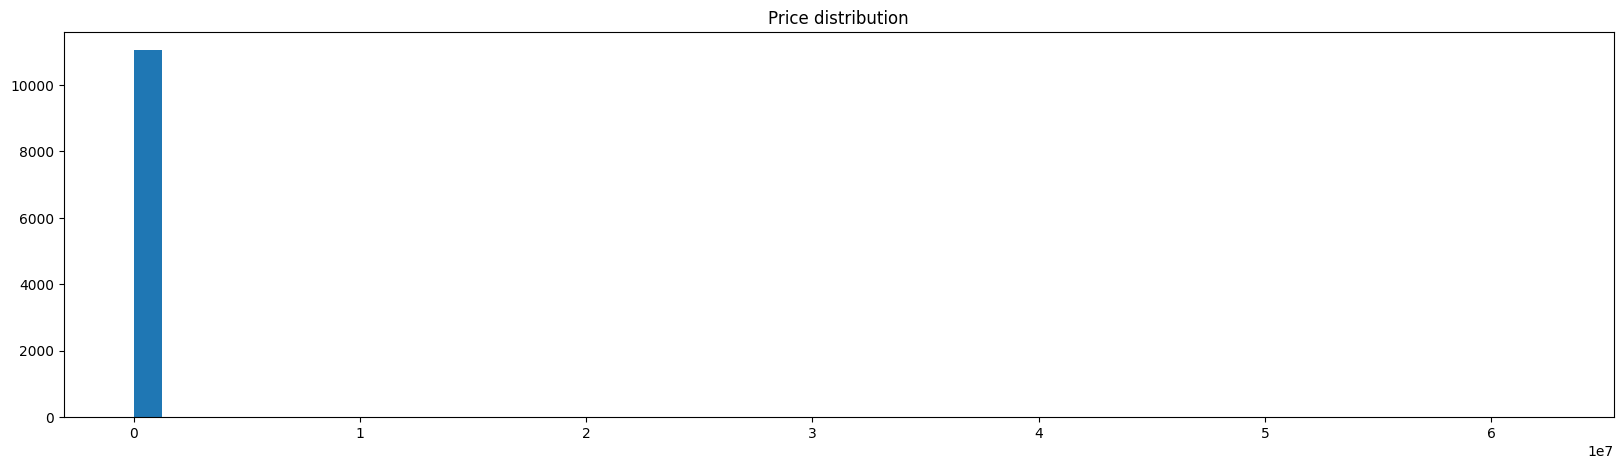

In [49]:
# Plotting a histogram for price
plt.figure(figsize=(20, 5))
plt.hist(listings_Santiago_df["price_float"], bins=50)
plt.title("Price distribution")
plt.plot()

<span style="color: red;">This attribute has an extreme outlier making difficult a proper visualization?</span>

In [50]:
listings_Santiago_df["price_float"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    1.105400e+04
mean     8.772322e+04
std      8.104908e+05
min      7.077000e+03
5%       1.751690e+04
25%      3.000000e+04
50%      4.311100e+04
75%      6.500000e+04
95%      2.358479e+05
max      6.230280e+07
Name: price_float, dtype: float64

In [51]:
# Let's make some calculations for determining an outlier threshold
q1 = listings_Santiago_df["price_float"].quantile(0.25)
q3 = listings_Santiago_df["price_float"].quantile(0.75)
iqr = q3 - q1

[]

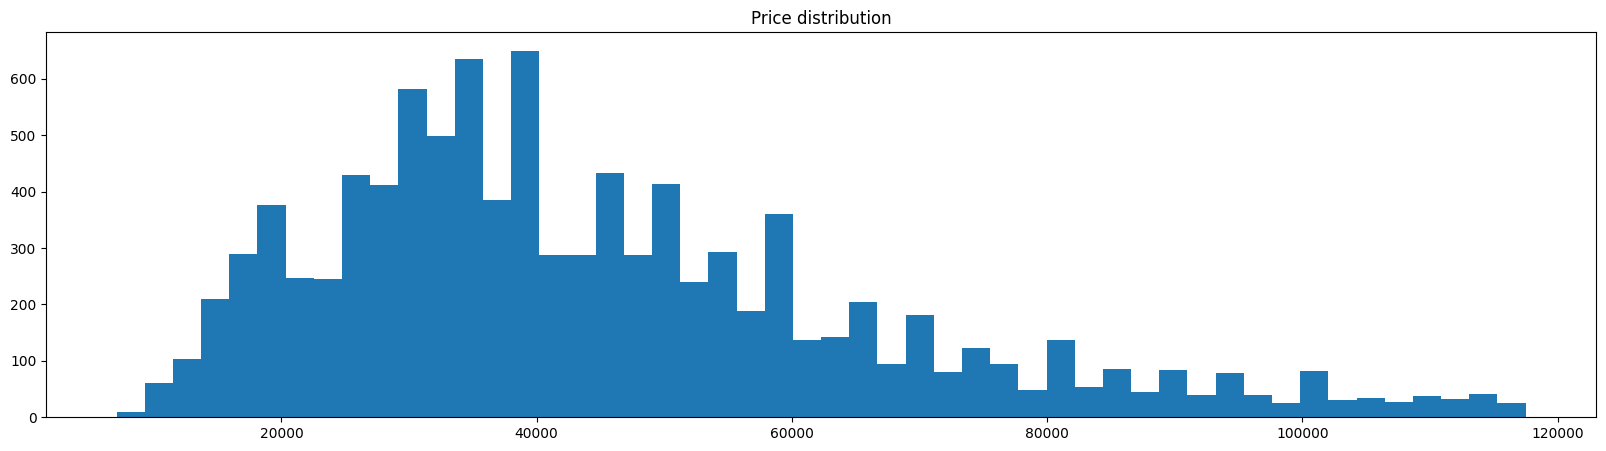

In [52]:
plt.figure(figsize=(20, 5))
plt.hist(listings_Santiago_df.loc[listings_Santiago_df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"], bins=50)
plt.title("Price distribution")
plt.plot()

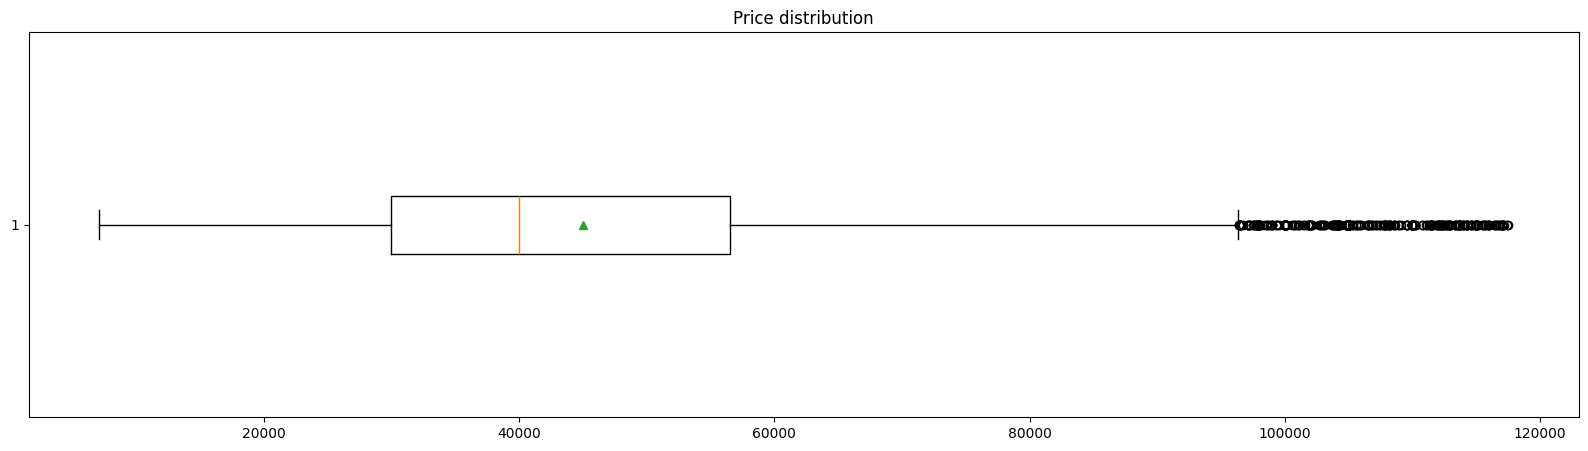

In [53]:
plt.figure(figsize=(20, 5))
plt.boxplot(listings_Santiago_df.loc[listings_Santiago_df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"], showmeans=True, vert=False)
plt.title("Price distribution")
plt.show()

#### 2.2 Location

In [54]:
# Showing unique values of neighborhoods
listings_Santiago_df["neighbourhood_cleansed"].unique()

array(['Providencia', 'Lo Barnechea', 'Recoleta', 'Santiago',
       'La Florida', 'Las Condes', 'La Reina', 'Ñuñoa', 'Independencia',
       'San Miguel', 'Vitacura', 'Maipú', 'Peñalolén', 'Estación Central',
       'Pedro Aguirre Cerda', 'San Joaquín', 'Macul', 'El Bosque',
       'Lo Espejo', 'La Cisterna', 'Quinta Normal', 'Quilicura',
       'Pudahuel', 'Lo Prado', 'Huechuraba', 'Renca', 'Cerrillos',
       'La Granja', 'Conchalí', 'Cerro Navia', 'San Ramón'], dtype=object)

In [55]:
#Frecuencia relativa
listings_Santiago_df["neighbourhood_cleansed"].value_counts(dropna=False, normalize=True)

neighbourhood_cleansed
Santiago               0.343446
Providencia            0.190684
Las Condes             0.168850
Ñuñoa                  0.076228
Lo Barnechea           0.056615
Vitacura               0.024669
Recoleta               0.020302
Estación Central       0.018463
La Florida             0.012334
San Miguel             0.011798
Macul                  0.010879
La Reina               0.009959
Maipú                  0.007814
Peñalolén              0.006818
Independencia          0.006589
San Joaquín            0.006435
Pudahuel               0.005516
La Cisterna            0.005516
Huechuraba             0.004214
Quinta Normal          0.003294
Quilicura              0.002911
Renca                  0.001685
El Bosque              0.000996
Cerrillos              0.000919
Lo Prado               0.000766
Conchalí               0.000689
La Granja              0.000689
Pedro Aguirre Cerda    0.000383
Cerro Navia            0.000383
Lo Espejo              0.000077
San Ramón        

In [56]:
#Frecuencia absoluta
listings_Santiago_df["neighbourhood_cleansed"].value_counts(dropna=False, normalize=False)

neighbourhood_cleansed
Santiago               4483
Providencia            2489
Las Condes             2204
Ñuñoa                   995
Lo Barnechea            739
Vitacura                322
Recoleta                265
Estación Central        241
La Florida              161
San Miguel              154
Macul                   142
La Reina                130
Maipú                   102
Peñalolén                89
Independencia            86
San Joaquín              84
Pudahuel                 72
La Cisterna              72
Huechuraba               55
Quinta Normal            43
Quilicura                38
Renca                    22
El Bosque                13
Cerrillos                12
Lo Prado                 10
Conchalí                  9
La Granja                 9
Pedro Aguirre Cerda       5
Cerro Navia               5
Lo Espejo                 1
San Ramón                 1
Name: count, dtype: int64

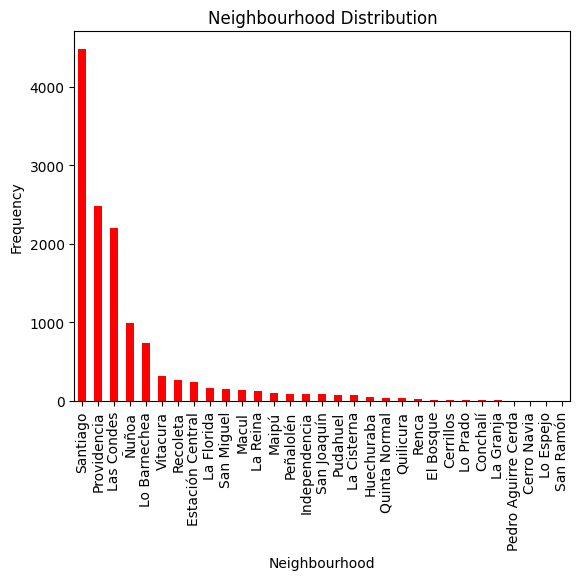

In [57]:
listings_Santiago_df["neighbourhood_cleansed"].value_counts().plot(kind="bar", color="red")
plt.title("Neighbourhood Distribution")
plt.xlabel("Neighbourhood")
plt.ylabel("Frequency")
plt.show()

In [58]:
df_geo = listings_Santiago_df[['neighbourhood_cleansed', 'latitude', 'longitude']].dropna()


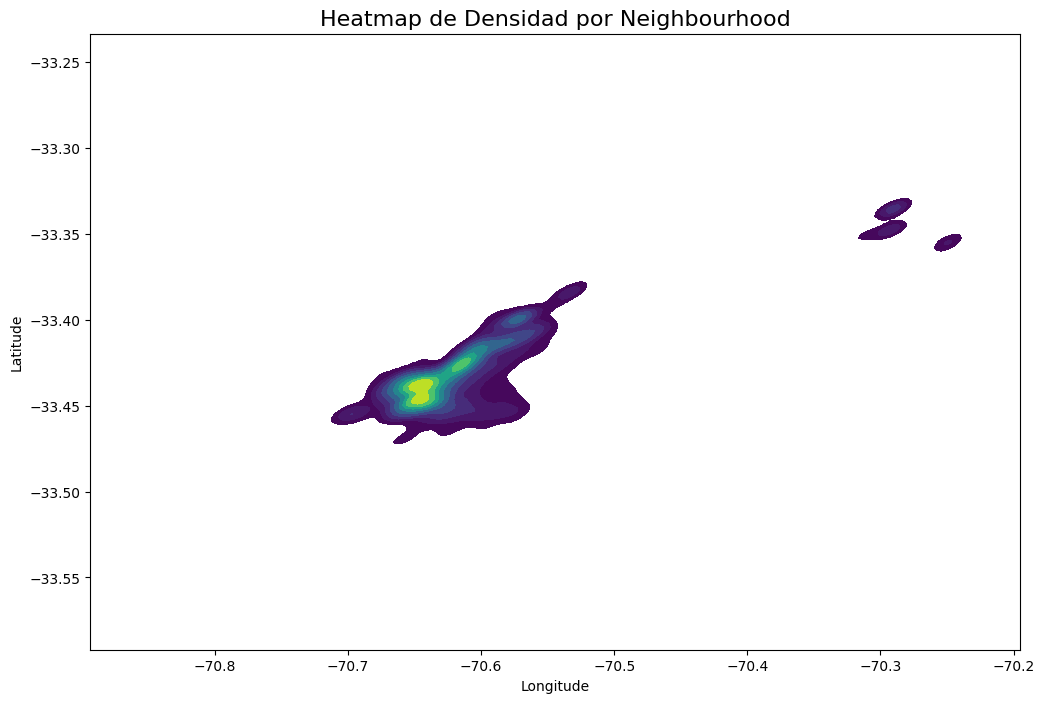

In [59]:
plt.figure(figsize=(12, 8))
sns.kdeplot(
    data=df_geo,
    x="longitude", 
    y="latitude", 
    cmap="viridis", # Puedes cambiar el color del mapa de densidad
    fill=True,
    bw_adjust=.5,
    thresh=0.2
)

plt.title('Heatmap de Densidad por Neighbourhood', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

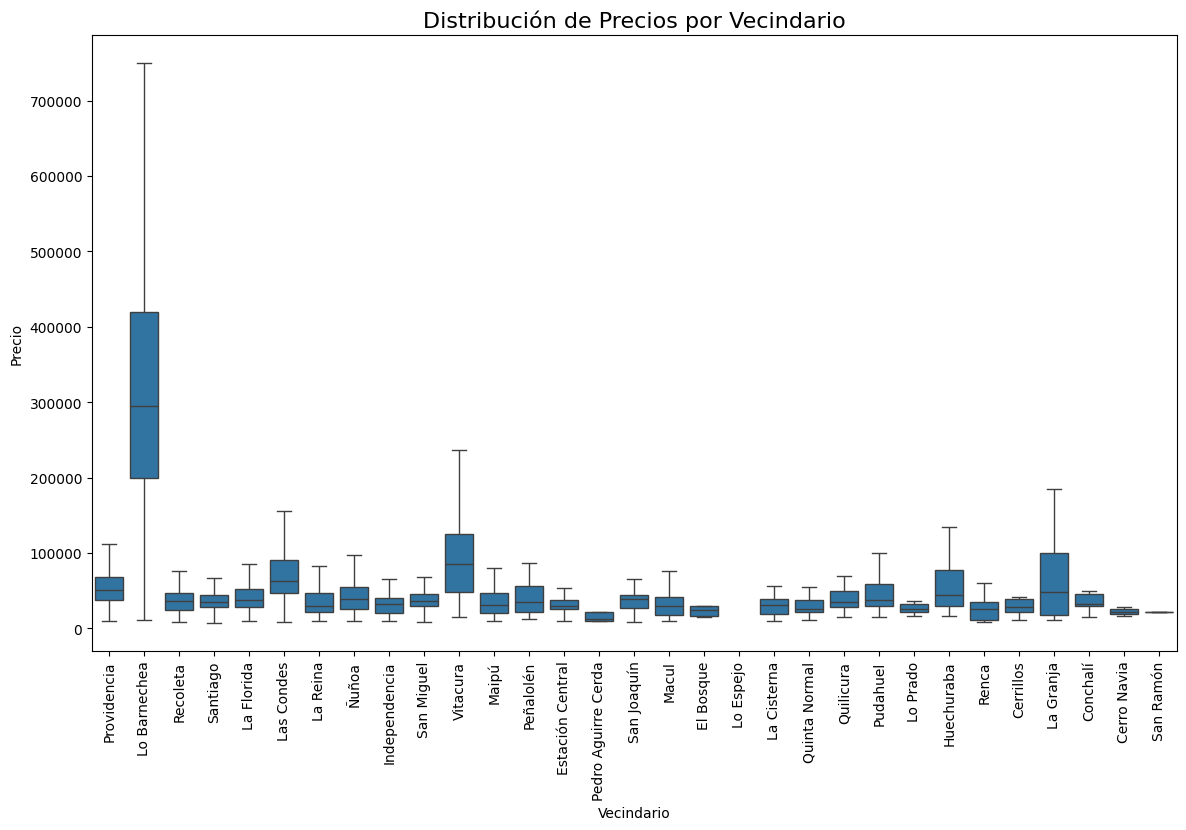

In [60]:
#boxplot - distribución de precios por vecindarios
plt.figure(figsize=(14, 8))
sns.boxplot(
    x='neighbourhood_cleansed', 
    y='price_float', 
    data=listings_Santiago_df,
    showfliers=False, # Ocultar outliers para una visualización más clara
)

plt.xticks(rotation=90)
plt.title('Distribución de Precios por Vecindario', fontsize=16)
plt.xlabel('Vecindario')
plt.ylabel('Precio')
plt.show()


C:\Users\lperd\AppData\Local\Temp\ipykernel_29180\2378857610.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\lperd\AppData\Local\Temp\ipykernel_29180\2378857610.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


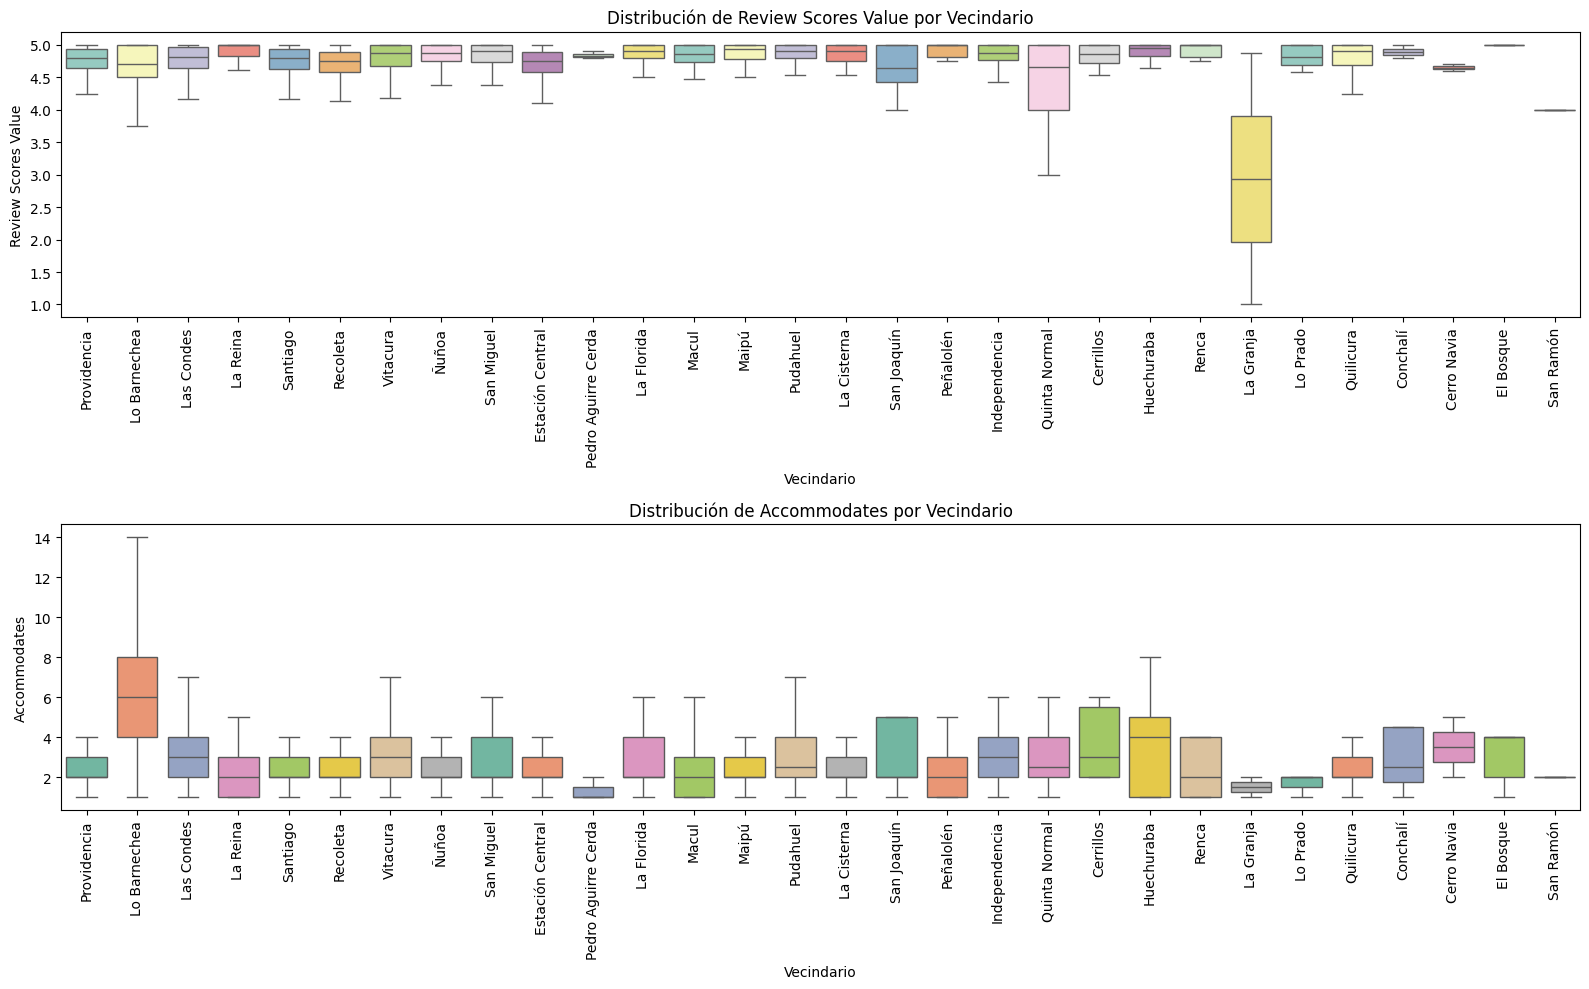

In [61]:
#Comparación de review_scores_value y accommodates entre diferentes vecindarios
plt.figure(figsize=(16, 10))

plt.subplot(2, 1, 1) # Primer subplot
sns.boxplot(
    x='neighbourhood_cleansed', 
    y='review_scores_value', 
    data=listings_Santiago_df[['neighbourhood_cleansed', 'review_scores_value', 'accommodates']].dropna(),
    showfliers=False,
    palette="Set3"
)
plt.xticks(rotation=90)
plt.title('Distribución de Review Scores Value por Vecindario')
plt.xlabel('Vecindario')
plt.ylabel('Review Scores Value')

plt.subplot(2, 1, 2) # Segundo subplot
sns.boxplot(
    x='neighbourhood_cleansed', 
    y='accommodates', 
    data=listings_Santiago_df[['neighbourhood_cleansed', 'review_scores_value', 'accommodates']].dropna(),
    showfliers=False,
    palette="Set2"
)
plt.xticks(rotation=90)
plt.title('Distribución de Accommodates por Vecindario')
plt.xlabel('Vecindario')
plt.ylabel('Accommodates')

plt.tight_layout()
plt.show()


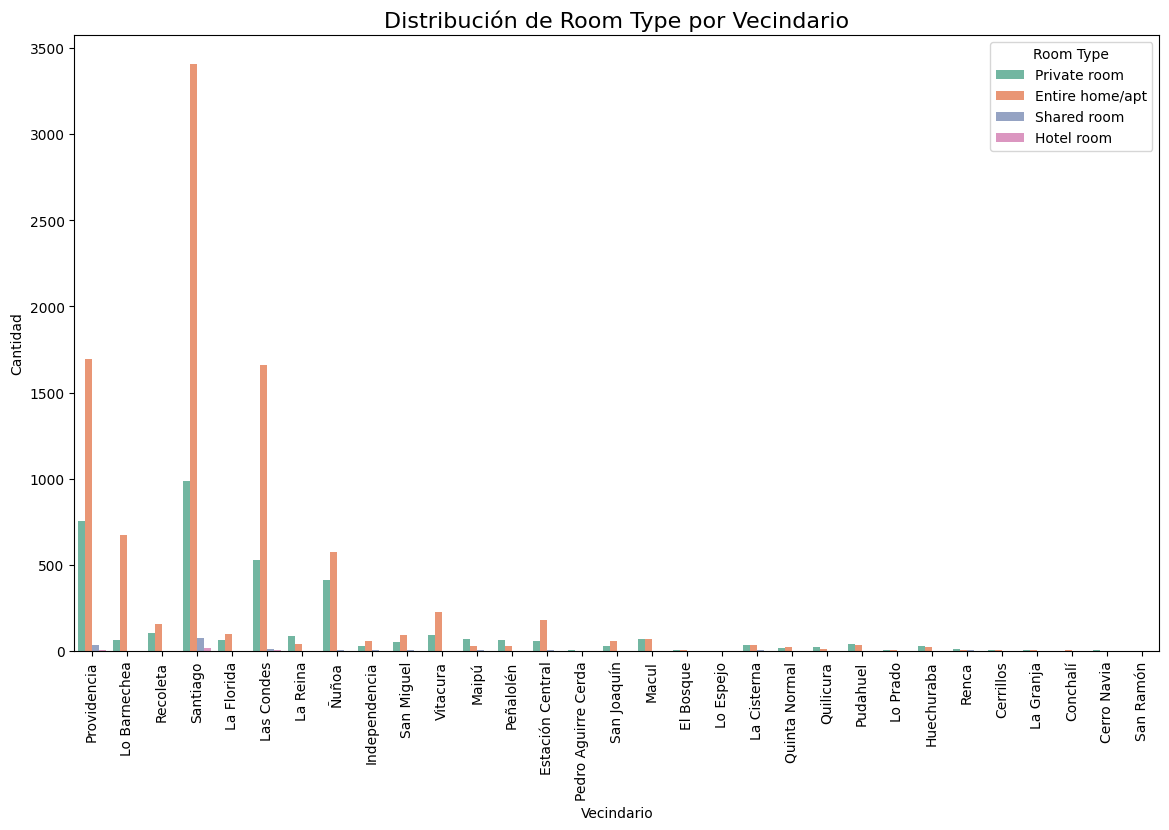

In [62]:
#Análisis de relación entre room_type y neighbourhood_cleansed. Countplot
plt.figure(figsize=(14, 8))

sns.countplot(
    data=listings_Santiago_df,
    x='neighbourhood_cleansed',
    hue='room_type',
    palette='Set2'
)

plt.xticks(rotation=90)

plt.title('Distribución de Room Type por Vecindario', fontsize=16)
plt.xlabel('Vecindario')
plt.ylabel('Cantidad')
plt.legend(title='Room Type')
plt.show()

In [63]:
#Análisis de relación entre room_type y neighbourhood_cleansed. Tabla de contingencia
contingency_table = pd.crosstab(listings_Santiago_df['neighbourhood_cleansed'], listings_Santiago_df['room_type'])
print(contingency_table)

room_type               Entire home/apt  Hotel room  Private room  Shared room
neighbourhood_cleansed                                                        
Cerrillos                             8           0             4            0
Cerro Navia                           1           0             4            0
Conchalí                              6           0             2            1
El Bosque                             6           0             7            0
Estación Central                    178           0            58            5
Huechuraba                           23           0            31            1
Independencia                        55           0            26            5
La Cisterna                          35           0            34            3
La Florida                           97           0            62            2
La Granja                             4           0             5            0
La Reina                             41           0 

In [64]:
#cluster de vecindarios por características similares
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features_neighbourhood = [
    'price_float',
    'number_of_reviews',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
]

df_grouped_neighbourhood = listings_Santiago_df.groupby('neighbourhood_cleansed')[features_neighbourhood].mean().dropna()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_grouped_neighbourhood)

In [65]:
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
df_grouped_neighbourhood['cluster'] = kmeans.fit_predict(df_scaled)
print(df_grouped_neighbourhood[['cluster']].head())

                        cluster
neighbourhood_cleansed         
Cerrillos                     2
Cerro Navia                   8
Conchalí                      2
El Bosque                     2
Estación Central              5


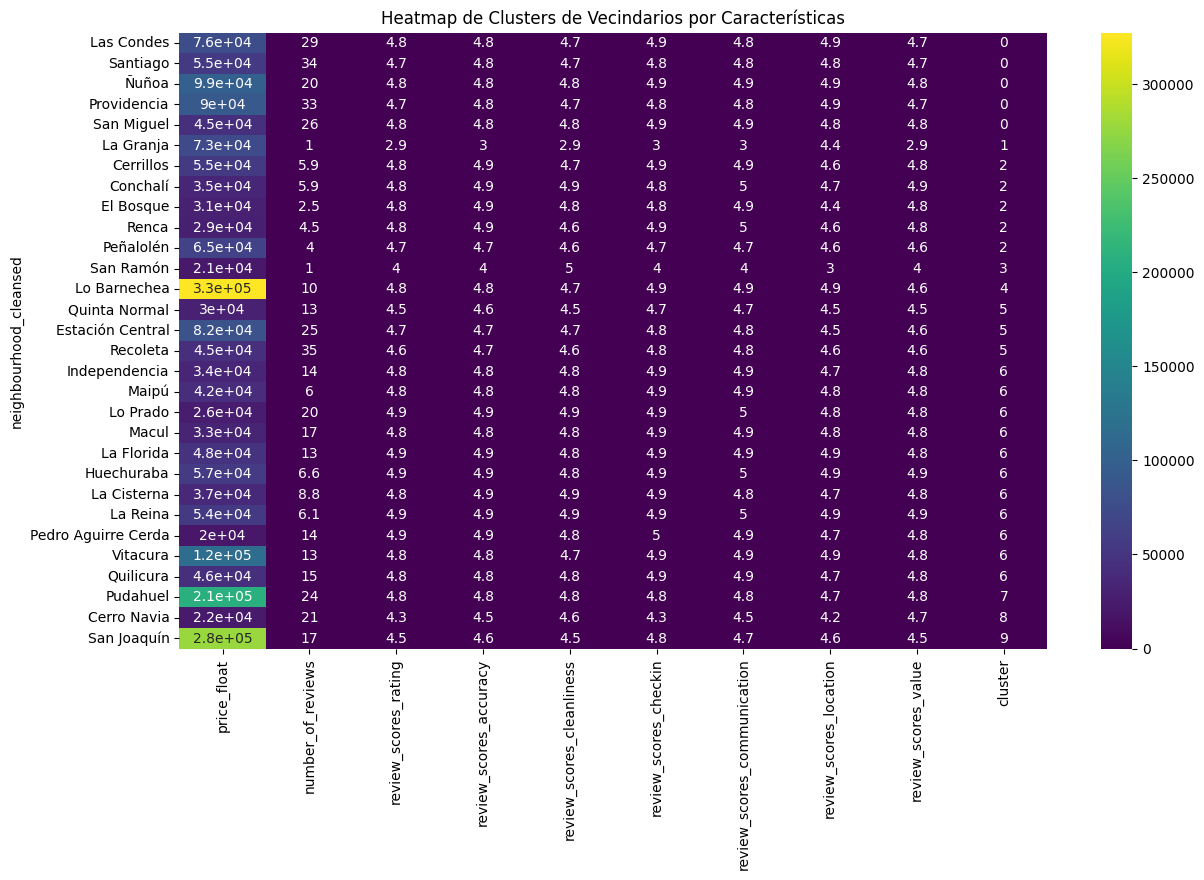

In [66]:
plt.figure(figsize=(14, 8))
sns.heatmap(df_grouped_neighbourhood.sort_values('cluster'), cmap='viridis', annot=True)
plt.title('Heatmap de Clusters de Vecindarios por Características')
plt.show()

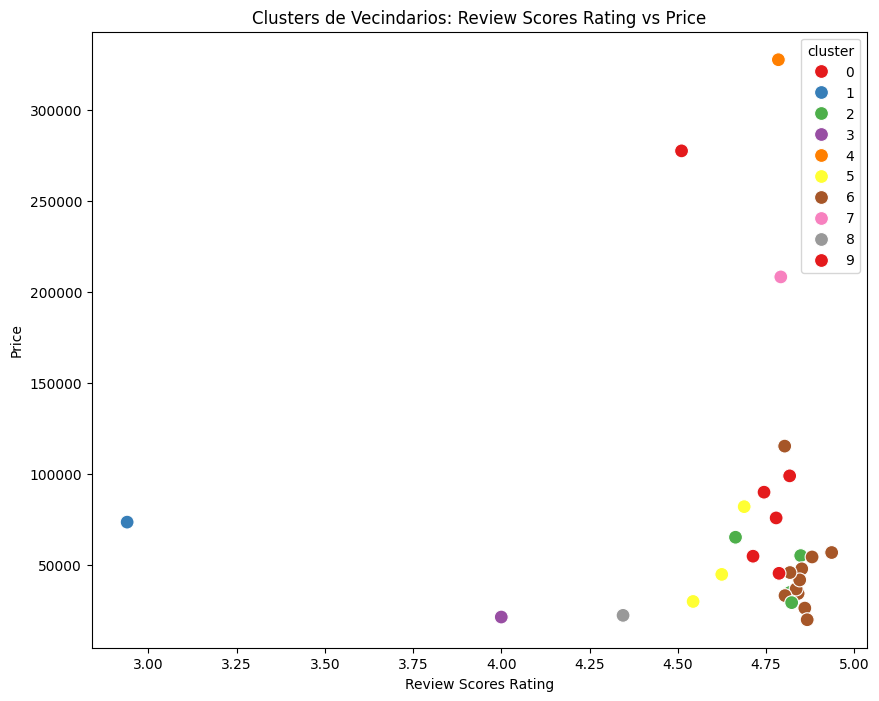

In [67]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=df_grouped_neighbourhood['review_scores_rating'], 
    y=df_grouped_neighbourhood['price_float'], 
    hue=df_grouped_neighbourhood['cluster'], 
    palette='Set1', 
    s=100
)
plt.title('Clusters de Vecindarios: Review Scores Rating vs Price')
plt.xlabel('Review Scores Rating')
plt.ylabel('Price')
plt.show()

#### 2.3 Property Type

In [68]:
# Calculating the relative frecuency of room types
listings_Santiago_df["room_type"].value_counts(dropna=False, normalize=True) # You can set normalize to False for calculating the absolute frecuency

room_type
Entire home/apt    0.705585
Private room       0.279093
Shared room        0.012794
Hotel room         0.002528
Name: proportion, dtype: float64

In [69]:
#Frecuencia absoluta
listings_Santiago_df["room_type"].value_counts(dropna=False, normalize=False)

room_type
Entire home/apt    9210
Private room       3643
Shared room         167
Hotel room           33
Name: count, dtype: int64

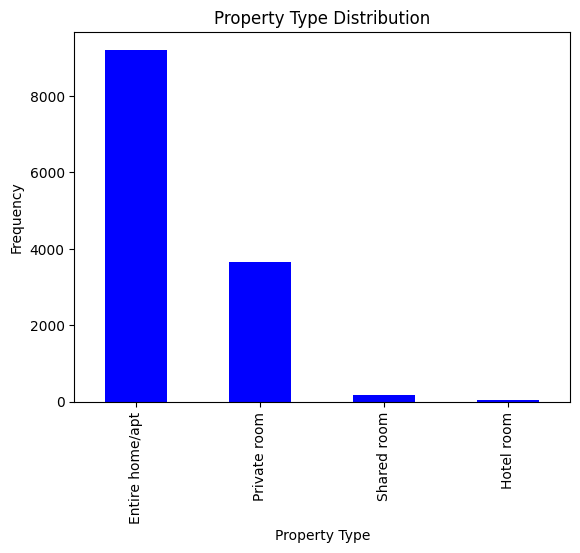

In [70]:
listings_Santiago_df["room_type"].value_counts().plot(kind="bar", color="blue")
plt.title("Property Type Distribution")
plt.xlabel("Property Type")
plt.ylabel("Frequency")
plt.show()

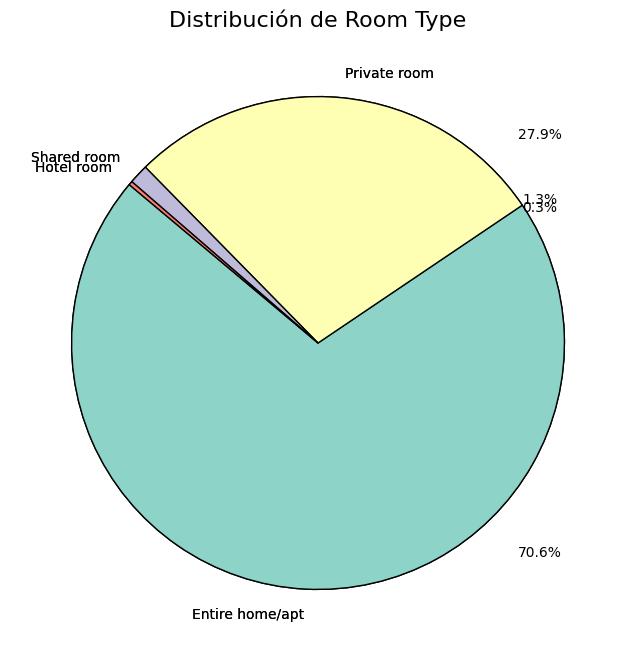

In [71]:
#Pie Chart
room_type_counts = listings_Santiago_df['room_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    room_type_counts, 
    labels=room_type_counts.index, 
    startangle=140, # Rotar el gráfico para una mejor visualización
    colors=sns.color_palette('Set3'), # Colores
    wedgeprops={'edgecolor': 'black'} # Borde negro para las porciones
)

wedges, texts, autotexts = plt.pie(
    room_type_counts, 
    labels=room_type_counts.index, 
    autopct='%1.1f%%', # Mostrar el porcentaje
    startangle=140, # Rotar el gráfico para una mejor visualización
    colors=sns.color_palette('Set3'), # Colores
    wedgeprops={'edgecolor': 'black'}, # Borde negro para las porciones
    pctdistance=0.85 # Ajustar la distancia del porcentaje al centro
)
for autotext in autotexts:
    autotext.set_position((0.9, autotext.get_position()[1]))  # Desplazar hacia fuera
    autotext.set_color('black')

plt.title('Distribución de Room Type', fontsize=16)
plt.show()

<Figure size 1400x800 with 0 Axes>

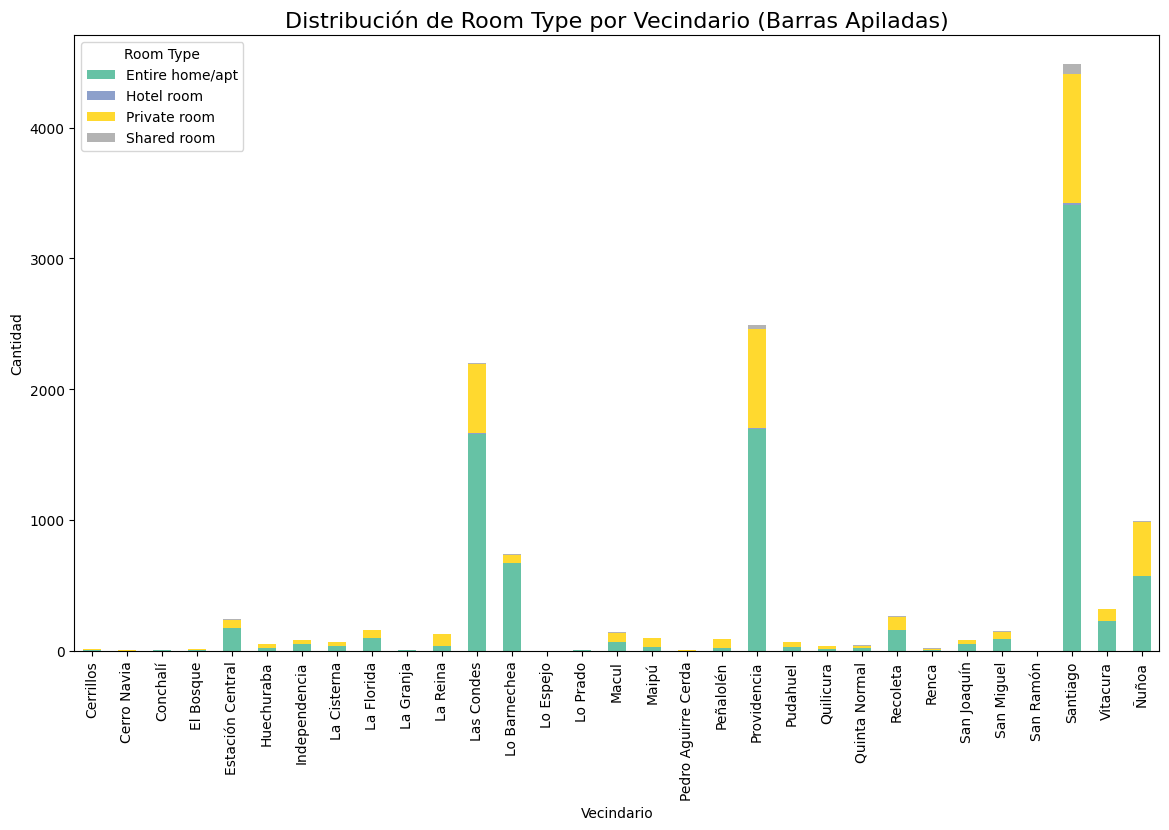

In [72]:
#Barras apiladas entre room_type y neighbourhood_cleansed
plt.figure(figsize=(14, 8))

listings_Santiago_df.groupby(['neighbourhood_cleansed', 'room_type']).size().unstack().plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set2')
plt.title('Distribución de Room Type por Vecindario (Barras Apiladas)', fontsize=16)
plt.xlabel('Vecindario')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.legend(title='Room Type')
plt.show()

c:\Users\lperd\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


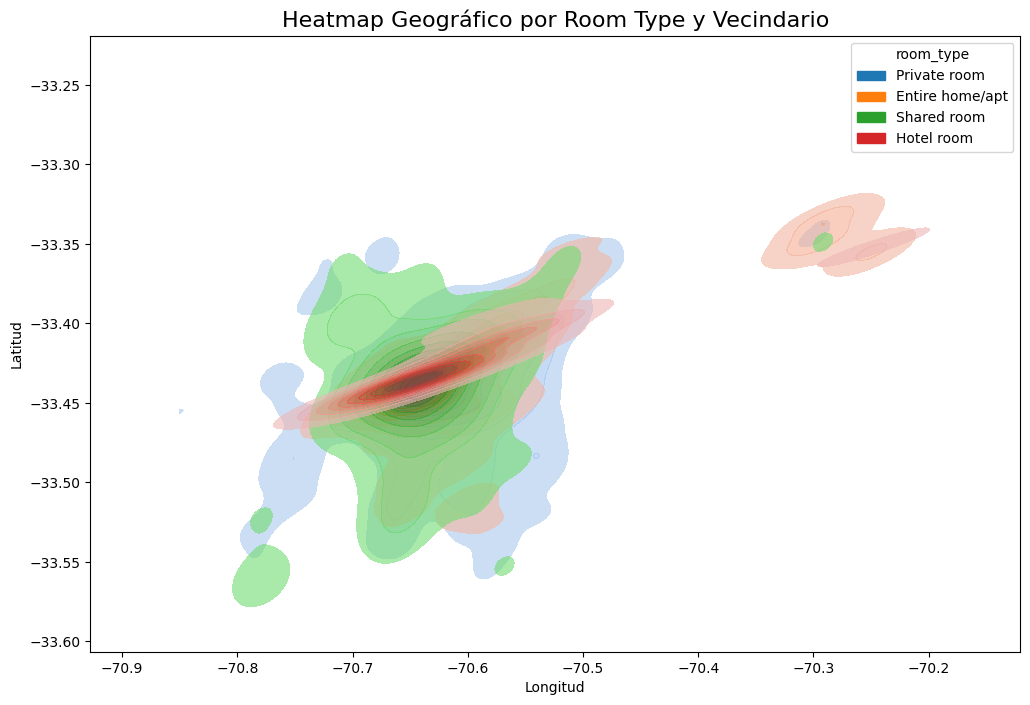

In [73]:
#heatmap geográfico entre room_type y neighbourhood_cleansed
plt.figure(figsize=(12, 8))
sns.kdeplot(
    x=listings_Santiago_df['longitude'], 
    y=listings_Santiago_df['latitude'], 
    hue=listings_Santiago_df['room_type'], 
    fill=True, 
    cmap='viridis',
    alpha=0.6,
    common_norm=False
)

plt.title('Heatmap Geográfico por Room Type y Vecindario', fontsize=16)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

C:\Users\lperd\AppData\Local\Temp\ipykernel_29180\1745549499.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


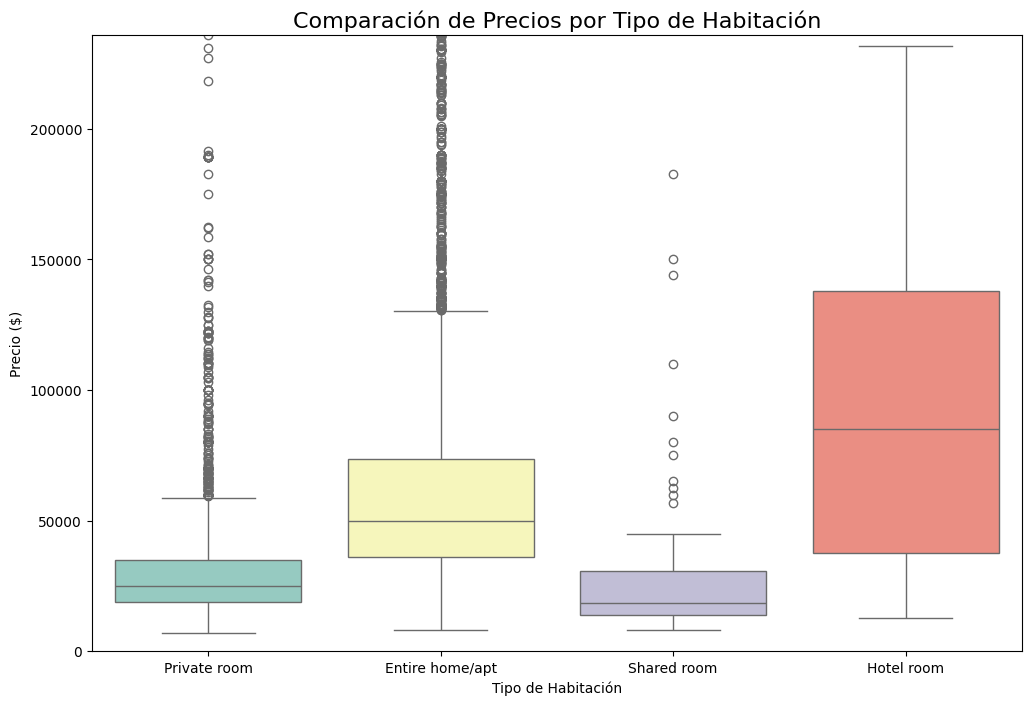

In [74]:
#boxplot para comparar precios por tipo de habitación
plt.figure(figsize=(12, 8))
sns.boxplot(
    x='room_type', 
    y='price_float', 
    data=listings_Santiago_df,
    palette='Set3'
)

plt.title('Comparación de Precios por Tipo de Habitación', fontsize=16)
plt.xlabel('Tipo de Habitación')
plt.ylabel('Precio ($)')
plt.ylim(0, listings_Santiago_df['price_float'].quantile(0.95))  # Limitar el eje y para reducir el efecto de los outliers
plt.show()

C:\Users\lperd\AppData\Local\Temp\ipykernel_29180\2365672982.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


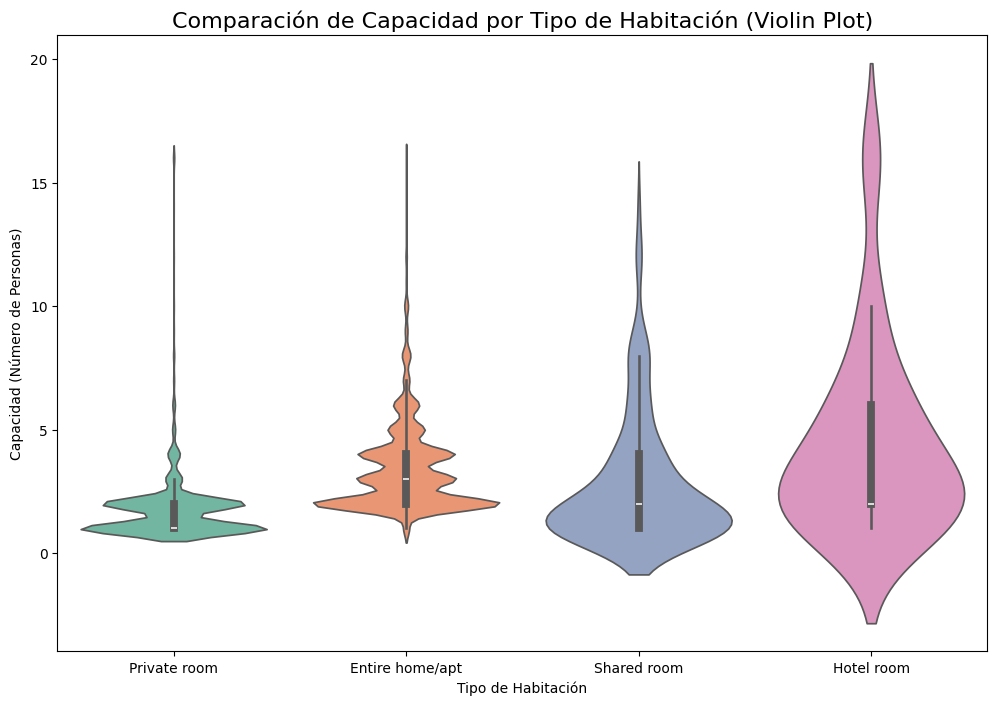

In [75]:
#comparación entre la capacidad de cada tipo de habitación (accommodates) y room_type
plt.figure(figsize=(12, 8))

sns.violinplot(
    x='room_type', 
    y='accommodates', 
    data=listings_Santiago_df,
    palette='Set2',
    inner='box'  # Añadir una caja interna para mostrar la mediana y los cuartiles
)

plt.title('Comparación de Capacidad por Tipo de Habitación (Violin Plot)', fontsize=16)
plt.xlabel('Tipo de Habitación')
plt.ylabel('Capacidad (Número de Personas)')

plt.show()

C:\Users\lperd\AppData\Local\Temp\ipykernel_29180\1507093560.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


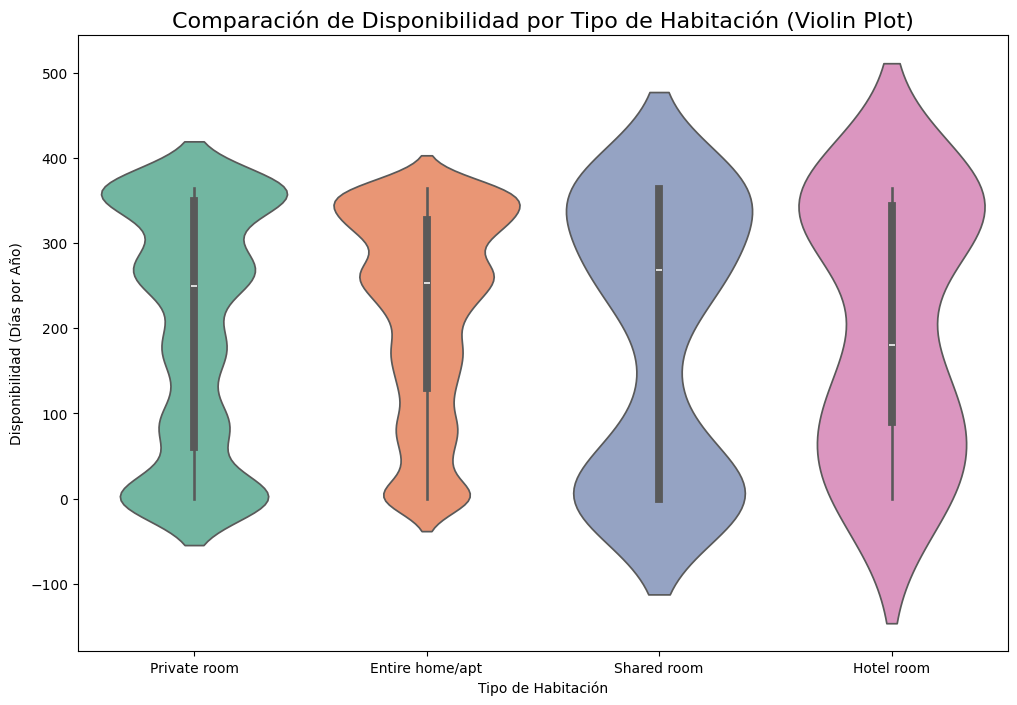

In [76]:
#relación entre room_type y la disponibilidad de la propiedad (availability_365)
plt.figure(figsize=(12, 8))

sns.violinplot(
    x='room_type', 
    y='availability_365', 
    data=listings_Santiago_df,
    palette='Set2',
    inner='box'  # Añadir una caja interna para mostrar la mediana y los cuartiles
)

plt.title('Comparación de Disponibilidad por Tipo de Habitación (Violin Plot)', fontsize=16)
plt.xlabel('Tipo de Habitación')
plt.ylabel('Disponibilidad (Días por Año)')
plt.show()

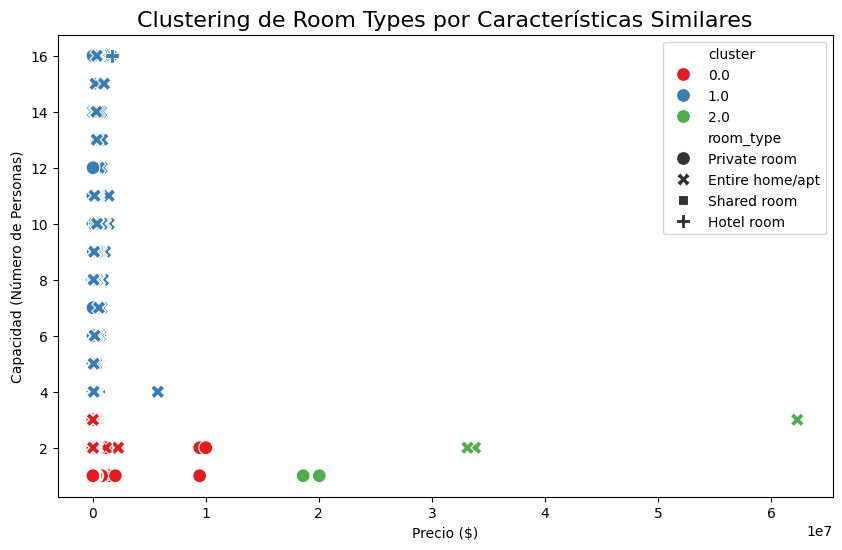

In [77]:
#cluster de room_type por características similares
features_room_type = listings_Santiago_df[['price_float','accommodates', 'availability_365']].dropna()
scaler = StandardScaler()
features_scaled_room_type = scaler.fit_transform(features_room_type)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_scaled_room_type)

listings_Santiago_df['cluster'] = pd.Series(clusters, index=features_room_type.index)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='price_float', 
    y='accommodates', 
    hue='cluster', 
    data=listings_Santiago_df, 
    palette='Set1', 
    style='room_type',
    s=100
)

plt.title('Clustering de Room Types por Características Similares', fontsize=16)
plt.xlabel('Precio ($)')
plt.ylabel('Capacidad (Número de Personas)')
plt.show()

#### 2.4 User Rating

In [78]:
mean_rating = listings_Santiago_df['review_scores_value'].mean(skipna=True)
print(mean_rating)

4.712848056537102


In [79]:
variance_rating = listings_Santiago_df['review_scores_value'].var(skipna=True)
print(variance_rating)

0.17415863856271085


In [80]:
std_dev_rating = listings_Santiago_df['review_scores_value'].std(skipna=True)
print(std_dev_rating)

0.4173231823931075


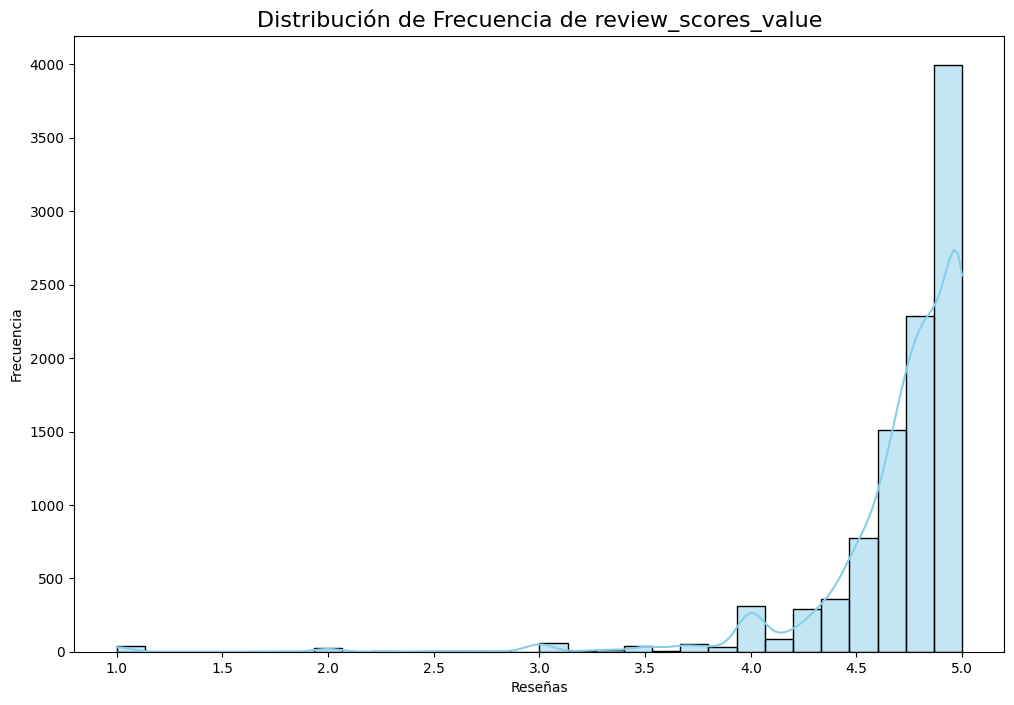

In [81]:
plt.figure(figsize=(12, 8))

sns.histplot(
    listings_Santiago_df['review_scores_value'].dropna(), 
    bins=30, 
    kde=True,  # Añadir una estimación de densidad (kde)
    color='skyblue'
)

plt.title('Distribución de Frecuencia de review_scores_value', fontsize=16)
plt.xlabel('Reseñas')
plt.ylabel('Frecuencia')
plt.show()

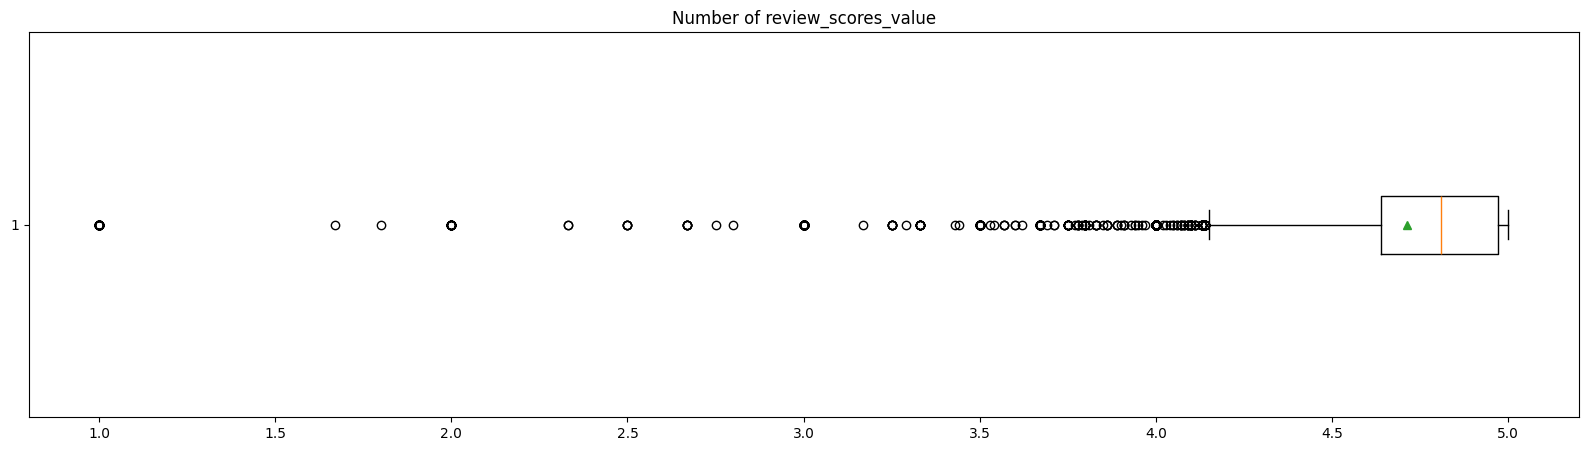

In [82]:

# Plotting a boxplot for review_scores_value
plt.figure(figsize=(20, 5))
plt.boxplot(listings_Santiago_df.loc[listings_Santiago_df["review_scores_value"] <= (q3 + 1.5 * iqr)]["review_scores_value"], showmeans=True, vert=False)
plt.title("Number of review_scores_value")
plt.show()

In [83]:
mean_number_reviews = listings_Santiago_df['number_of_reviews'].mean(skipna=True)
print(mean_number_reviews)

27.994713858883017


In [84]:
variance_number_reviews = listings_Santiago_df['number_of_reviews'].var(skipna=True)
print(variance_number_reviews)

3127.9907014447035


In [85]:
std_dev_number_review = listings_Santiago_df['number_of_reviews'].std(skipna=True)
print(std_dev_number_review)

55.92844268746184


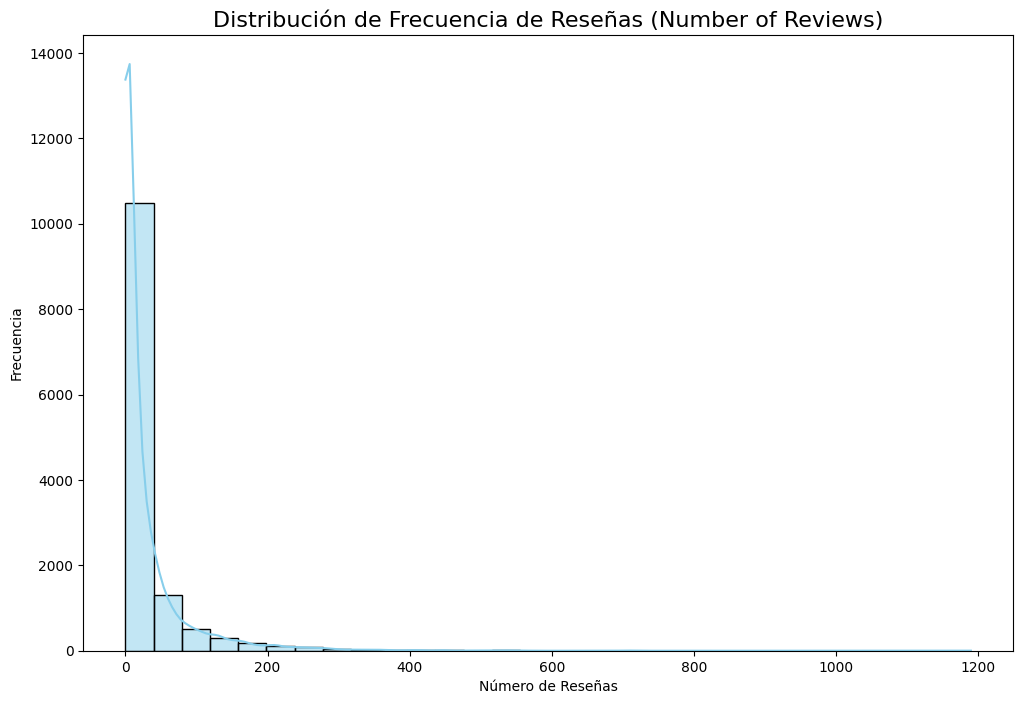

In [86]:
#distribución de frecuencias
plt.figure(figsize=(12, 8))

sns.histplot(
    listings_Santiago_df['number_of_reviews'].dropna(), 
    bins=30, 
    kde=True,  # Añadir una estimación de densidad (kde)
    color='skyblue'
)

plt.title('Distribución de Frecuencia de Reseñas (Number of Reviews)', fontsize=16)
plt.xlabel('Número de Reseñas')
plt.ylabel('Frecuencia')
plt.show()

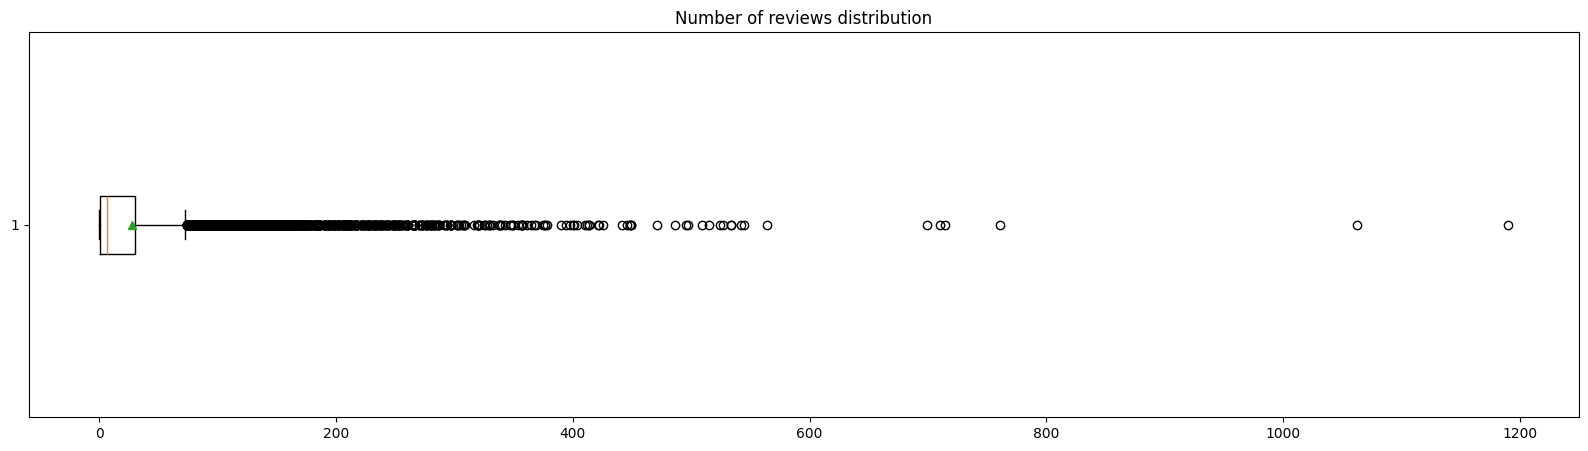

In [87]:
# Plotting a boxplot for number of reviews
plt.figure(figsize=(20, 5))
plt.boxplot(listings_Santiago_df["number_of_reviews"], showmeans=True, vert=False)
plt.title("Number of reviews distribution")
plt.show()

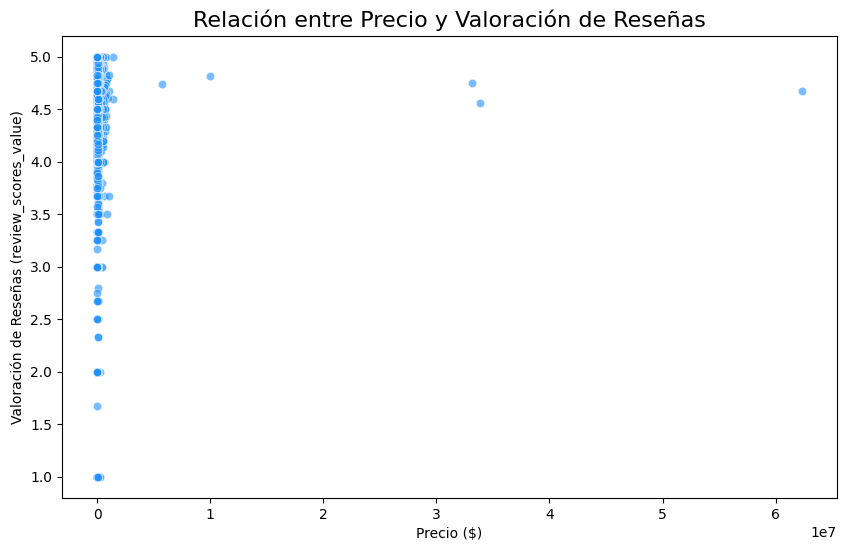

In [88]:
#scatter plot para comparar variables numéricas como price con review_scores_value
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='price_float', 
    y='review_scores_value', 
    data=listings_Santiago_df, 
    alpha=0.6, 
    color='dodgerblue'
)

plt.title('Relación entre Precio y Valoración de Reseñas', fontsize=16)
plt.xlabel('Precio ($)')
plt.ylabel('Valoración de Reseñas (review_scores_value)')
plt.show()

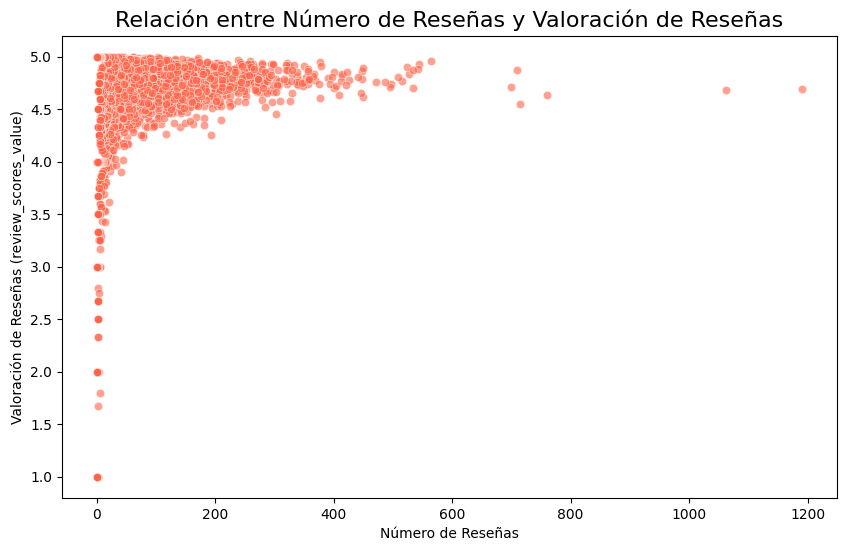

In [89]:
#scatter plot para comparar variables numéricas como number of reviews con review_scores_value
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='number_of_reviews', 
    y='review_scores_value', 
    data=listings_Santiago_df, 
    alpha=0.6, 
    color='tomato'
)

plt.title('Relación entre Número de Reseñas y Valoración de Reseñas', fontsize=16)
plt.xlabel('Número de Reseñas')
plt.ylabel('Valoración de Reseñas (review_scores_value)')
plt.show()

C:\Users\lperd\AppData\Local\Temp\ipykernel_29180\959366031.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


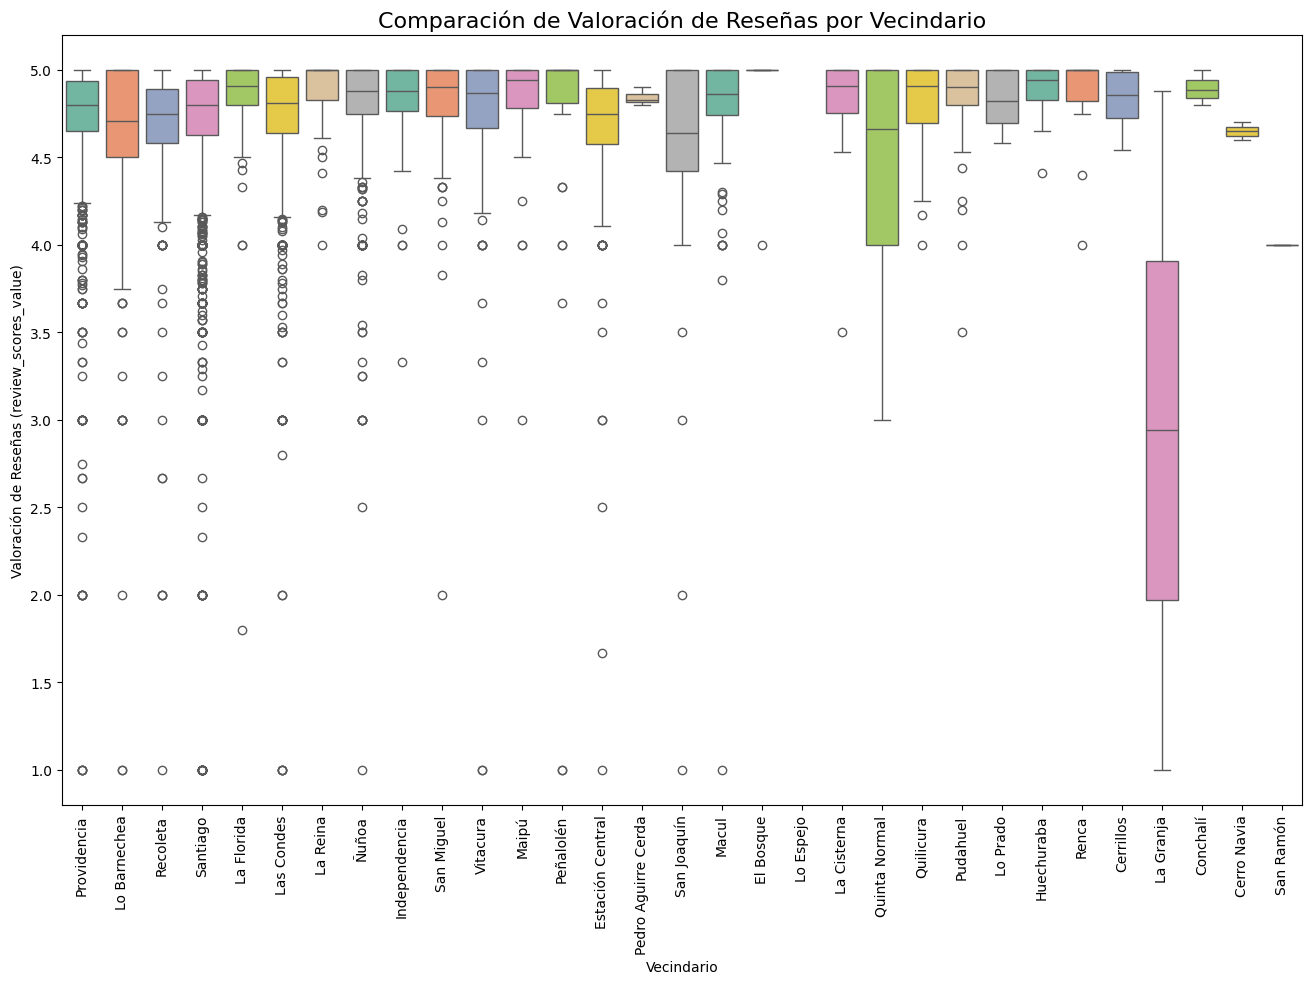

In [90]:
#boxplot para comparar review_scores_value con neighbourhood_cleansed
plt.figure(figsize=(16, 10))

sns.boxplot(
    x='neighbourhood_cleansed', 
    y='review_scores_value', 
    data=listings_Santiago_df,
    palette='Set2'
)

plt.xticks(rotation=90)
plt.title('Comparación de Valoración de Reseñas por Vecindario', fontsize=16)
plt.xlabel('Vecindario')
plt.ylabel('Valoración de Reseñas (review_scores_value)')
plt.show()

C:\Users\lperd\AppData\Local\Temp\ipykernel_29180\3029767831.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


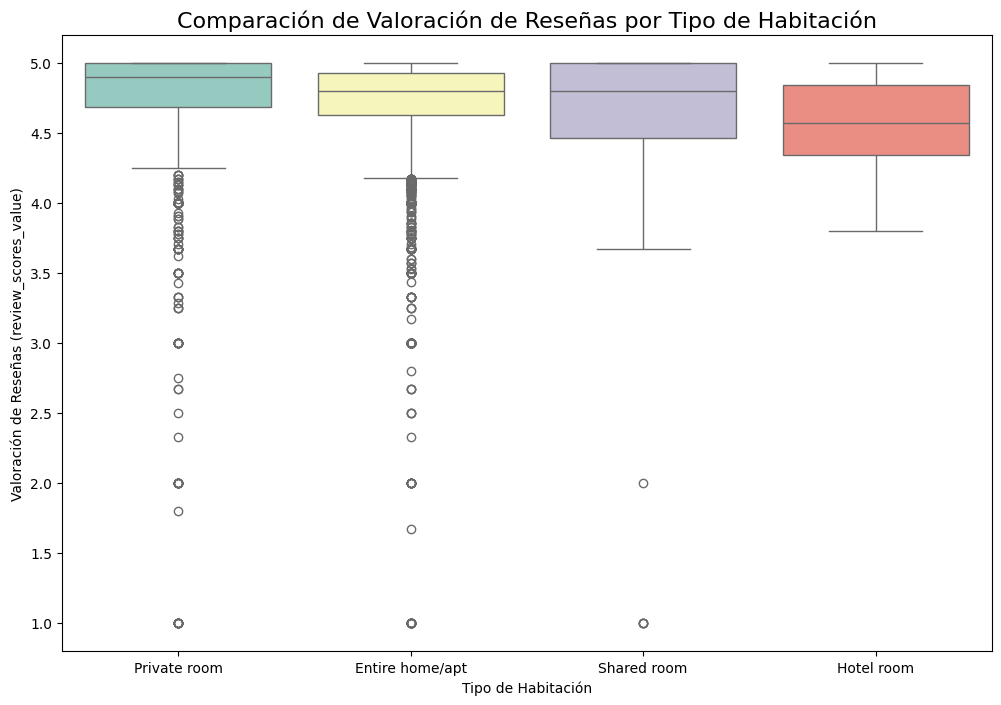

In [91]:
#boxplot para comparar review_scores_value con room_type
plt.figure(figsize=(12, 8))

sns.boxplot(
    x='room_type', 
    y='review_scores_value', 
    data=listings_Santiago_df,
    palette='Set3'
)

plt.title('Comparación de Valoración de Reseñas por Tipo de Habitación', fontsize=16)
plt.xlabel('Tipo de Habitación')
plt.ylabel('Valoración de Reseñas (review_scores_value)')
plt.show()

In [92]:
#Distribución de frecuencia number_of_reviews
df_number_reviews = listings_Santiago_df['number_of_reviews'].dropna()
frequency_distribution_number_reviews = df_number_reviews.value_counts().sort_index()
print(frequency_distribution_number_reviews)

number_of_reviews
0       3144
1        968
2        650
3        504
4        416
        ... 
710        1
714        1
761        1
1062       1
1190       1
Name: count, Length: 349, dtype: int64


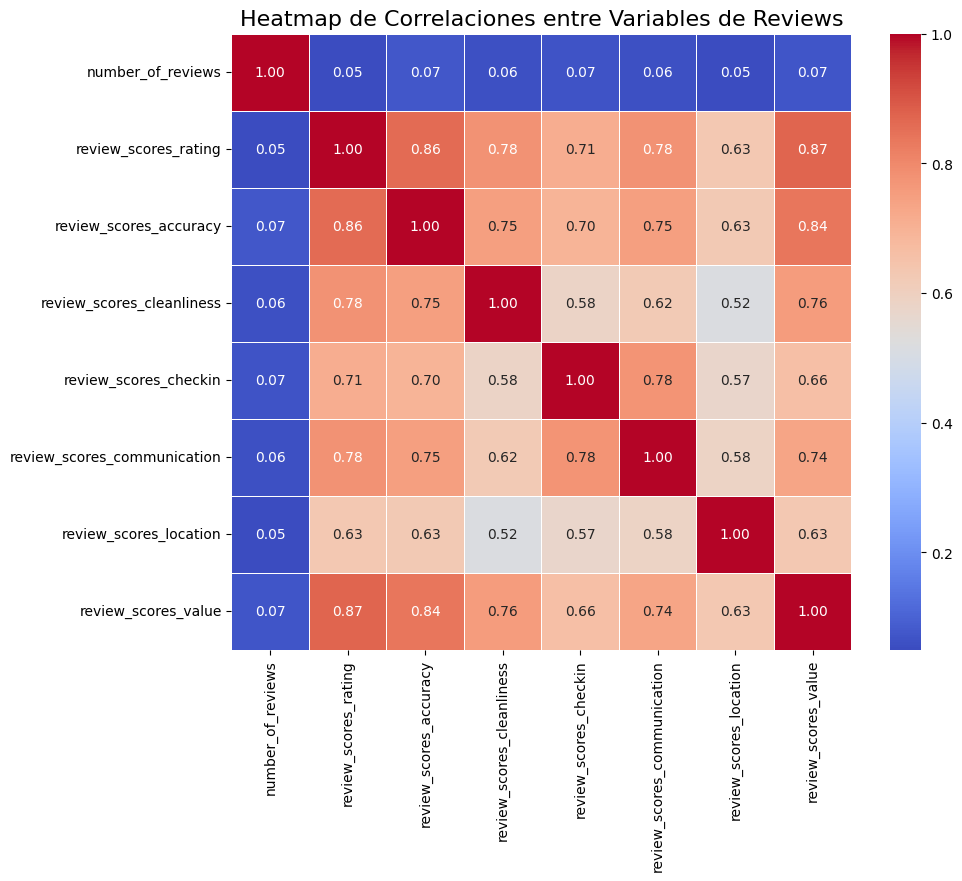

In [93]:
#Correlación reviews
review_columns = [
    'number_of_reviews', 
    'review_scores_rating', 
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
]

df_reviews = listings_Santiago_df[review_columns].dropna()
corr_matrix = df_reviews.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(
    corr_matrix, 
    annot=True, # Mostrar los valores de correlación en el mapa
    cmap="coolwarm", # Colormap para el heatmap
    fmt=".2f", # Formato de los valores de correlación
    linewidths=0.5 # Ancho de las líneas que separan las celdas
)

plt.title('Heatmap de Correlaciones entre Variables de Reviews', fontsize=16)
plt.show()

#### 2.5 Amenities

In [94]:
listings_Santiago_df["amenities"].unique()

array(['[]',
       '["Pool", "BBQ grill", "Air conditioning", "Wifi", "Shampoo", "Fire extinguisher", "Carbon monoxide alarm", "Microwave", "Paid parking on premises", "Dishes and silverware", "Hair dryer", "TV with standard cable", "Washer", "Host greets you", "Oven", "Heating", "Hangers", "Long term stays allowed", "Elevator", "Paid parking off premises", "First aid kit", "Cooking basics", "Smoke alarm", "Refrigerator", "Essentials", "Gym", "Dryer", "Iron", "Hot water", "Kitchen"]',
       '["Free parking on premises", "Essentials", "Self check-in", "Building staff", "Heating", "TV with standard cable", "Hot water", "Kitchen"]',
       ...,
       '["Pets allowed", "TV", "Paid parking on premises", "Wifi", "Host greets you", "Kitchen", "Exterior security cameras on property"]',
       '["Dining table", "Freezer", "Clothing storage", "Laundromat nearby", "Free parking on premises", "Room-darkening shades", "Bed linens", "Outdoor furniture", "Wifi", "Shampoo", "Body soap", "Fire extin

In [95]:
#'Amenities' contains the services as a text string separated by commas, let's convert those text strings into lists
listings_Santiago_df['amenities'] = listings_Santiago_df['amenities'].apply(lambda x: x.split(','))

In [96]:
#Generate a set of all unique 'amenities' values
unique_amenities = set()
listings_Santiago_df['amenities'].apply(lambda x: unique_amenities.update(x))

0        None
1        None
2        None
3        None
4        None
         ... 
13048    None
13049    None
13050    None
13051    None
13052    None
Name: amenities, Length: 13053, dtype: object

In [97]:
#Convert the set into a list for better handling
unique_amenities = list(unique_amenities)

In [98]:
#Show the list of unique amenities
print("Listado de amenities únicos:")
for amenity in unique_amenities:
    print(amenity.strip()) #strip() method removes unnecessary whitespace

Listado de amenities únicos:
"Mademza refrigerator"
"Pack \u2019n play/Travel crib - available upon request"
["HDTV with standard cable"
"Fast wifi \u2013 629 Mbps"
"Loreal elvive shampoo"
"Otro induction stove"
"Corriente shampoo"
["Dryer \u2013 In building"
["Hl conditioner"
"48 inch TV with Roku"
"Tradicional body soap"
"Safe"]
"Private BBQ grill: charcoal
"Pantene  conditioner"
"Est\u00e1ndar. No hipoalerg\u00e9nico body soap"
"De Avena body soap"
["60 inch TV with standard cable
"35 inch HDTV"
"Mademsa nueva 6 platos con horno
"Xx refrigerator"
"Outdoor kitchen with oven
"Fast wifi \u2013 281 Mbps"
"Shared BBQ grill: electric"
"1 shampoo diario por persona  shampoo"
"Fast wifi \u2013 238 Mbps"
"Dishes and silverware"
"Game console: PS5"
"Libero refrigerator"
"Bowling alley"
"Gen\u00e9rico sound system with aux"
"Fast wifi \u2013 67 Mbps"]
"Private hot tub - available seasonally"
es cocina con quemadores horno a gas amplio oven"
"Teka stainless steel induction stove"
"Recco oven"
"

In [99]:
all_amenities = [amenity.strip() for sublist in listings_Santiago_df['amenities'] for amenity in sublist]

from collections import Counter
amenity_counts = Counter(all_amenities)

top_10_amenities = amenity_counts.most_common(10)

top_10_df = pd.DataFrame(top_10_amenities, columns=['Amenity', 'Frequency'])

print(top_10_df)


                   Amenity  Frequency
0                   "Wifi"       9405
1              "Hot water"       8781
2             "Essentials"       8674
3                "Hangers"       8369
4             "Hair dryer"       8355
5  "Dishes and silverware"       8260
6         "Cooking basics"       7530
7             "Bed linens"       7340
8                "Kitchen"       7170
9           "Refrigerator"       7127


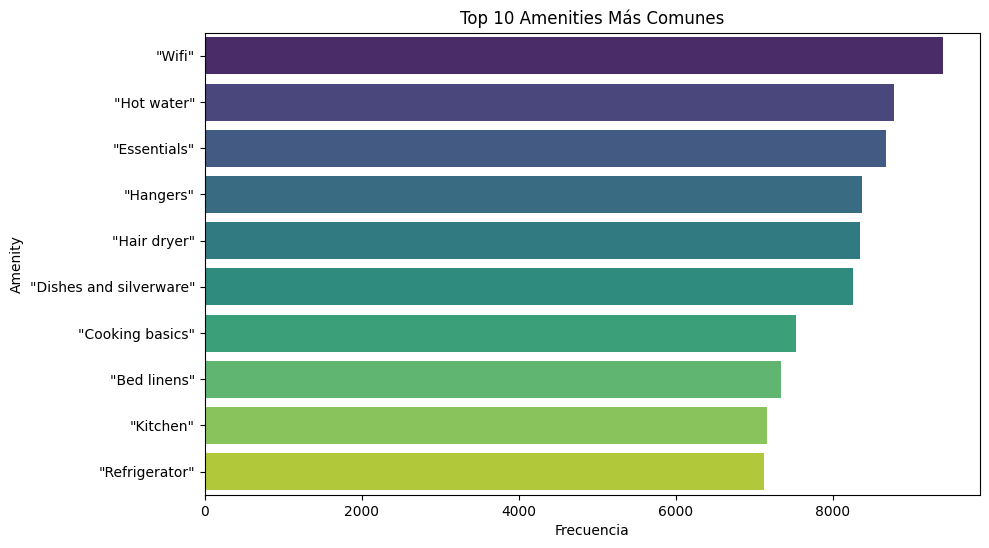

In [100]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette("viridis", n_colors=10)
sns.barplot(x='Frequency', y='Amenity', data=top_10_df, hue='Amenity', dodge=False, palette= colors, legend=False)
plt.title('Top 10 Amenities Más Comunes')
plt.xlabel('Frecuencia')
plt.ylabel('Amenity')
plt.show()

In [101]:
moda_amenity = amenity_counts.most_common(1)
print("La moda (amenity más común) es:", moda_amenity[0][0])
print("Con una frecuencia de:", moda_amenity[0][1])

La moda (amenity más común) es: "Wifi"
Con una frecuencia de: 9405


##### Reglas de Asociaciones para Amenities

In [102]:
pip.main(["install","mlxtend"])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: mlxtend in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (0.23.1)

Requirement already satisfied: scipy>=1.2.1 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from mlxtend) (1.14.1)

Requirement already satisfied: numpy>=1.16.2 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from mlxtend) (2.1.0)

Requirement already satisfied: pandas>=0.24.2 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from mlxtend) (2.2.2)

Requirement already satisfied: scikit-learn>=1.0.2 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from mlxtend) (1.5.1)

Requirement already satisfied: matplotlib>=3.0.0 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from mlxtend) (3.9.2)

Requirement already satisfied: joblib>=0.13.2 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from mlxtend) (1.4.2)

Requirement already satisfied: contourpy>=1.0.1 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from matplotlib>=3.0.0->mlxtend) (1.2.1)

Requirement already satisfied: cycler>=0.10 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from matplotlib>=3.0.0->mlxtend) (0.12.1)

Requirement already satisfied: fonttools>=4.22.0 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from matplotlib>=3.0.0->mlxtend) (4.53.1)

Requirement already satisfied: kiwisolver>=1.3.1 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from matplotlib>=3.0.0->mlxtend) (1.4.5)

Requirement already satisfied: packaging>=20.0 in c:\users\lperd\appdata\roaming\python\python312\site-packages (from matplotlib>=3.0.0->mlxtend) (24.1)

Requirement already satisfied: pillow>=8 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from matplotlib>=3.0.0->mlxtend) (10.4.0)

Requirement already satisfied: pyparsing>=2.3.1 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from matplotlib>=3.0.0->mlxtend) (3.1.2)

Requirement already satisfied: python-dateutil>=2.7 in c:\users\lperd\appdata\roaming\python\python312\site-packages (from matplotlib>=3.0.0->mlxtend) (2.9.0.post0)

Requirement already satisfied: pytz>=2020.1 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from pandas>=0.24.2->mlxtend) (2024.1)

Requirement already satisfied: tzdata>=2022.7 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from pandas>=0.24.2->mlxtend) (2024.1)

Requirement already satisfied: threadpoolctl>=3.1.0 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from scikit-learn>=1.0.2->mlxtend) (3.5.0)

Requirement already satisfied: six>=1.5 in c:\users\lperd\appdata\roaming\python\python312\site-packages (from python-dateutil>=2.7->matplotlib>=3.0.0->mlxtend) (1.16.0)

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip

0

In [103]:
#from mlxtend.frequent_patterns import apriori, association_rules
#from mlxtend.preprocessing import TransactionEncoder

#te = TransactionEncoder()
#te_ary = te.fit(listings_Santiago_df['amenities']).transform(listings_Santiago_df['amenities'])
#df_amenities = pd.DataFrame(te_ary, columns=te.columns_)

#frequent_itemsets = apriori(df_amenities, min_support=0.1, use_colnames=True)

MemoryError: Unable to allocate 50.3 GiB for an array with shape (690298, 6, 13053) and data type bool

#### Other 

In [104]:
# Calculating basic statistics of accommodates
listings_Santiago_df["accommodates"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    13053.000000
mean         2.930284
std          1.843821
min          1.000000
5%           1.000000
25%          2.000000
50%          2.000000
75%          4.000000
95%          6.000000
max         16.000000
Name: accommodates, dtype: float64

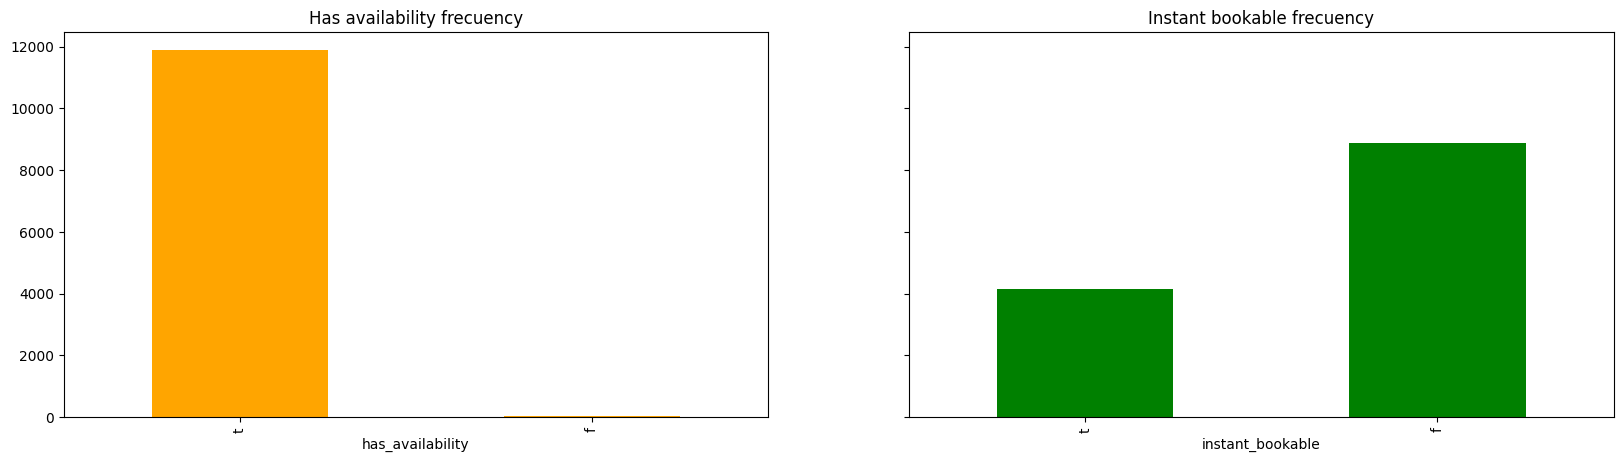

In [105]:
# Plotting bar charts for has availability and instant bookable
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 5))
listings_Santiago_df["has_availability"].value_counts().plot(kind="bar", ax=ax1, color="orange")
listings_Santiago_df["instant_bookable"].value_counts().sort_index(ascending=False).plot(kind="bar", ax=ax2, color="green")
ax1.set_title("Has availability frecuency")
ax2.set_title("Instant bookable frecuency")
plt.show()

### 2. Bivariate analysis

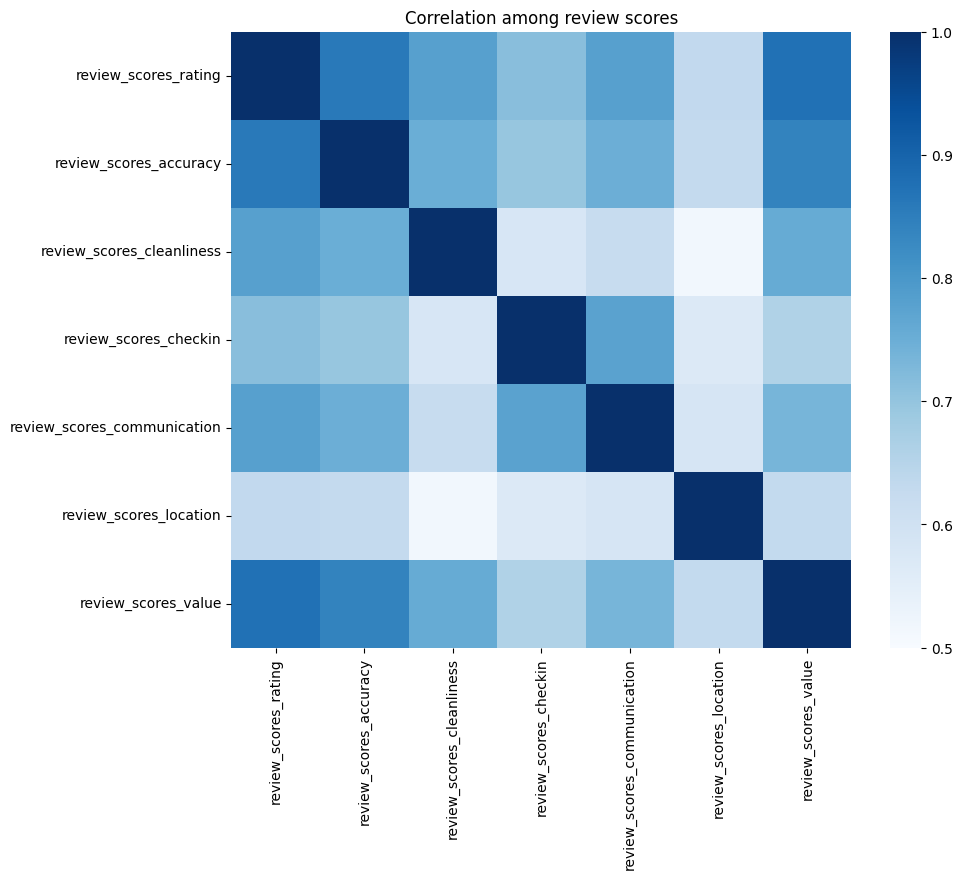

In [106]:
# Plotting correlation heatmap among review scores
plt.figure(figsize=(10, 8))
sns.heatmap(
    listings_Santiago_df[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]].corr(),
    vmin=0.5, vmax=1,
    cmap="Blues"
)
plt.title("Correlation among review scores")
plt.show()

In [107]:
# For large datasets, some visualizations are innefective when trying to represent individual instances
# A naive strategy is to use only a random sample to visualize
listings_sample_df =  listings_Santiago_df.loc[listings_Santiago_df["price_float"] <= (q3 + 1.5 * iqr)].sample(frac=0.1)
listings_sample_df.shape

(993, 77)

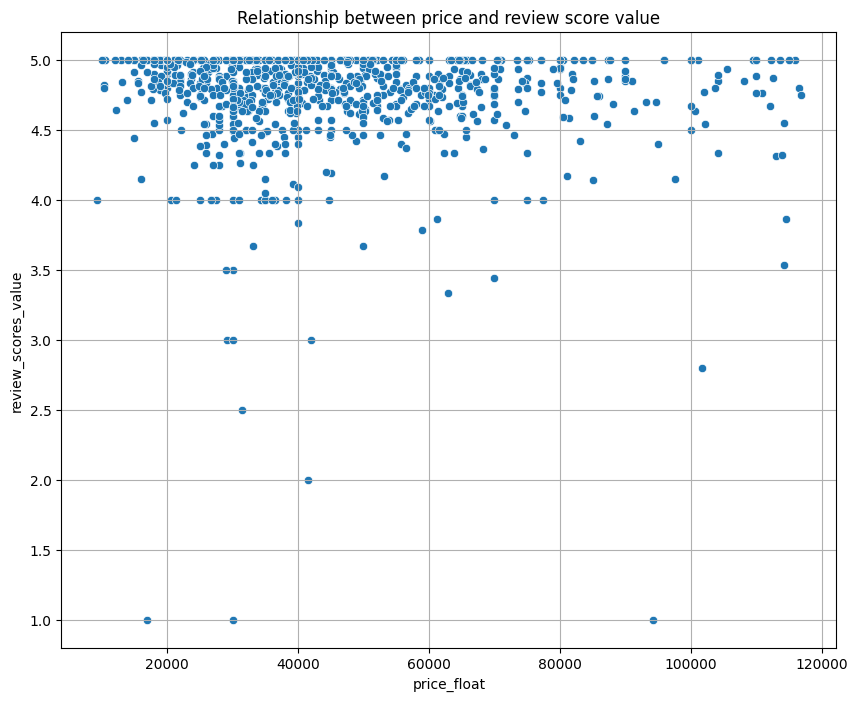

In [108]:
# Plotting the relationship between price and review score value
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=listings_sample_df["price_float"],
    y=listings_sample_df["review_scores_value"]
)
plt.title("Relationship between price and review score value")
plt.grid()
plt.show()

In [109]:
# Another common strategy for working with datasets with high variability is by filtering the dataset by representative groups according to the context
# In this sense, let's work only with the neighbourhoods with more listings (pareto analysis)
neighbourhood_frec_cumsum = listings_Santiago_df["neighbourhood_cleansed"].value_counts(normalize=True).cumsum()

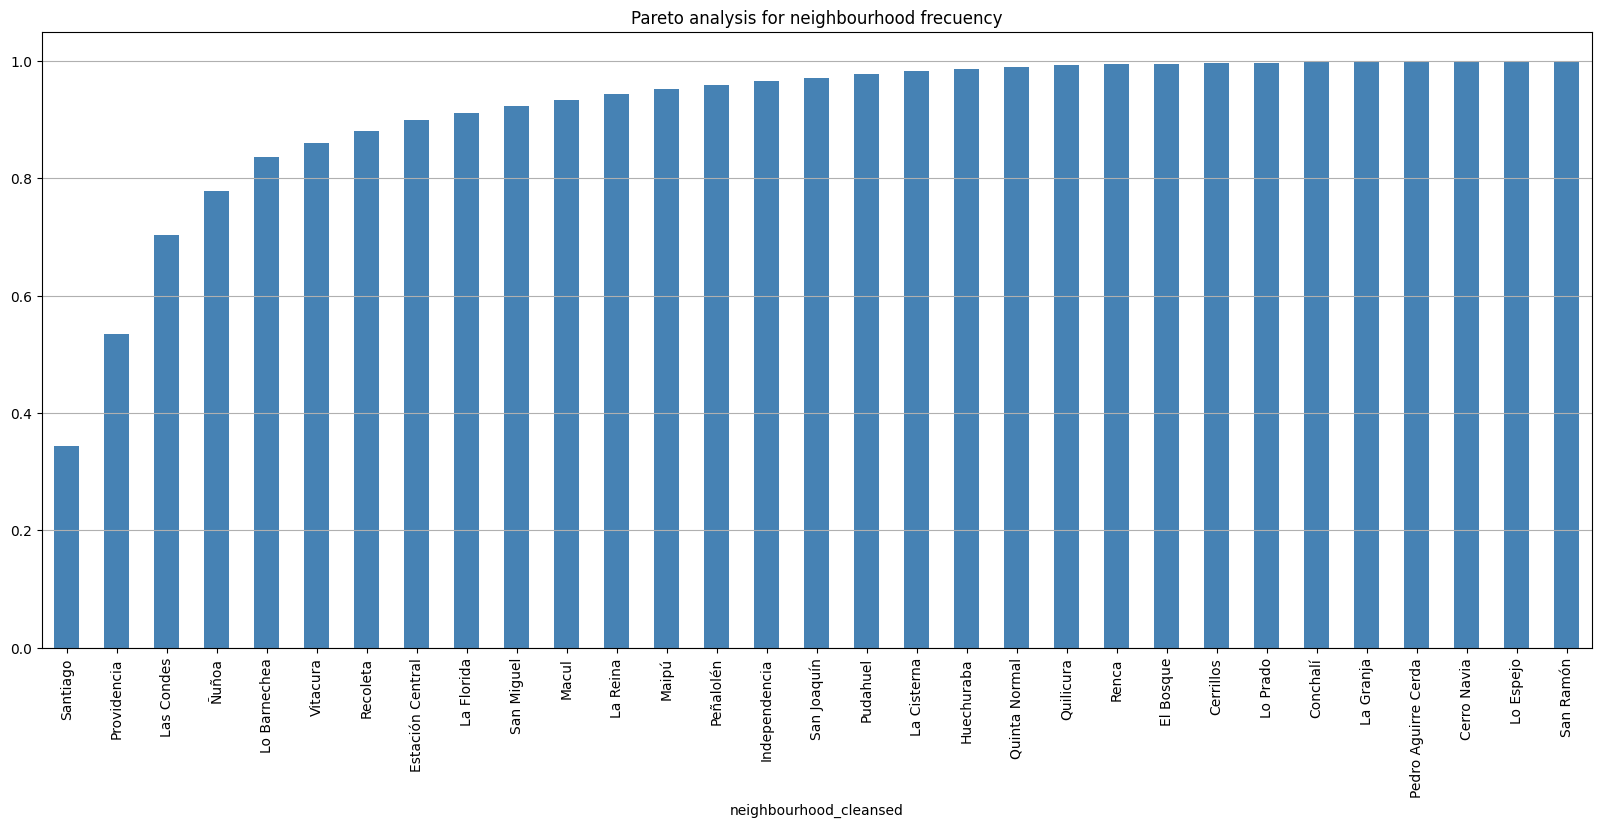

In [110]:
# Plotting pareto analysis for neighbourhood frecuency
plt.figure(figsize=(20, 8))
neighbourhood_frec_cumsum.plot(kind="bar", color="steelblue")
plt.title("Pareto analysis for neighbourhood frecuency")
plt.grid(axis="y")
plt.show()

In [111]:
most_representative_neighbourhoods = neighbourhood_frec_cumsum.loc[neighbourhood_frec_cumsum < 0.8].index.tolist()
most_representative_neighbourhoods

['Santiago', 'Providencia', 'Las Condes', 'Ñuñoa']

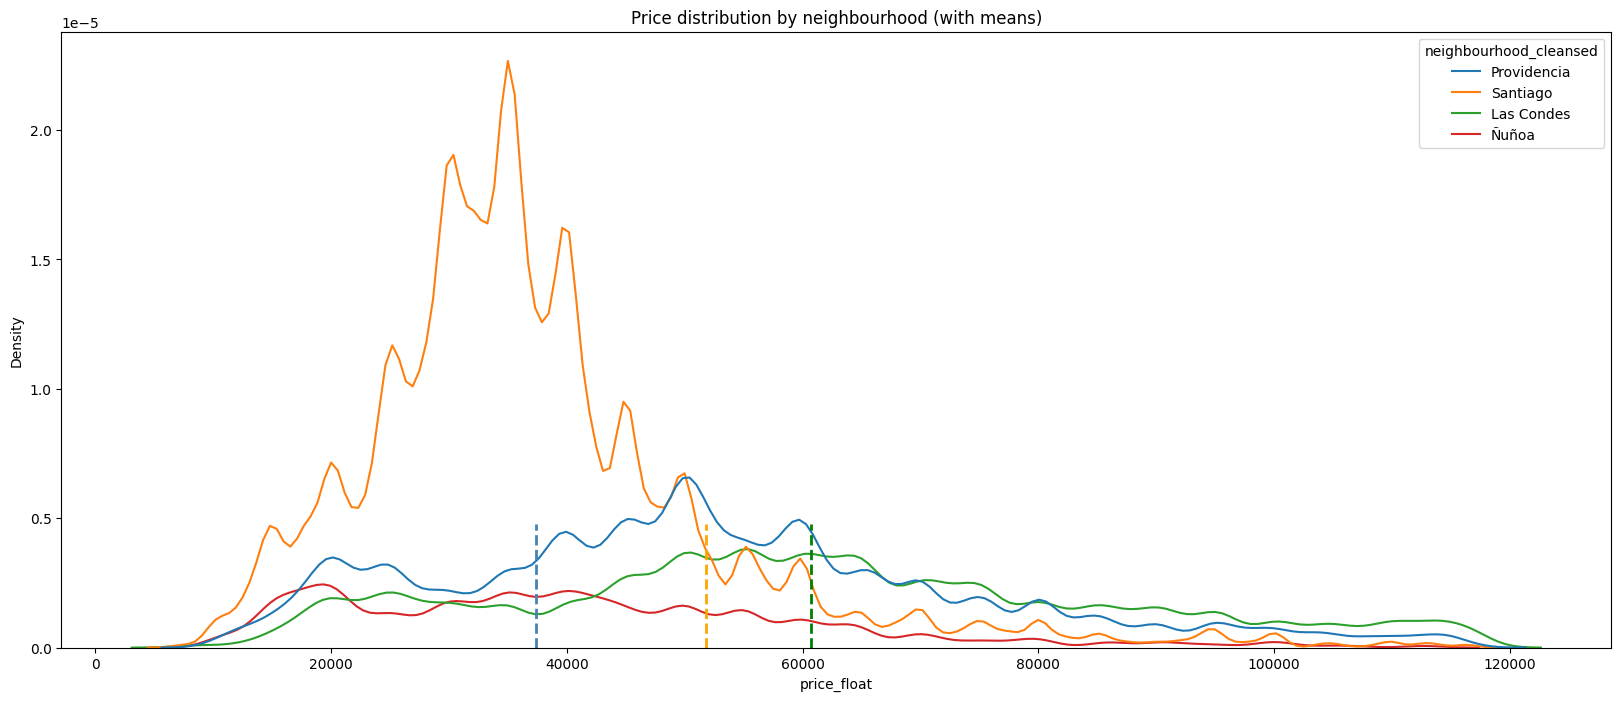

In [112]:
# Plotting price distribution by neighborhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_Santiago_df.loc[listings_Santiago_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_Santiago_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="price_float",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_Santiago_df.loc[listings_Santiago_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_Santiago_df["neighbourhood_cleansed"] == neighbourhood, "price_float"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Price distribution by neighbourhood (with means)")
plt.show()

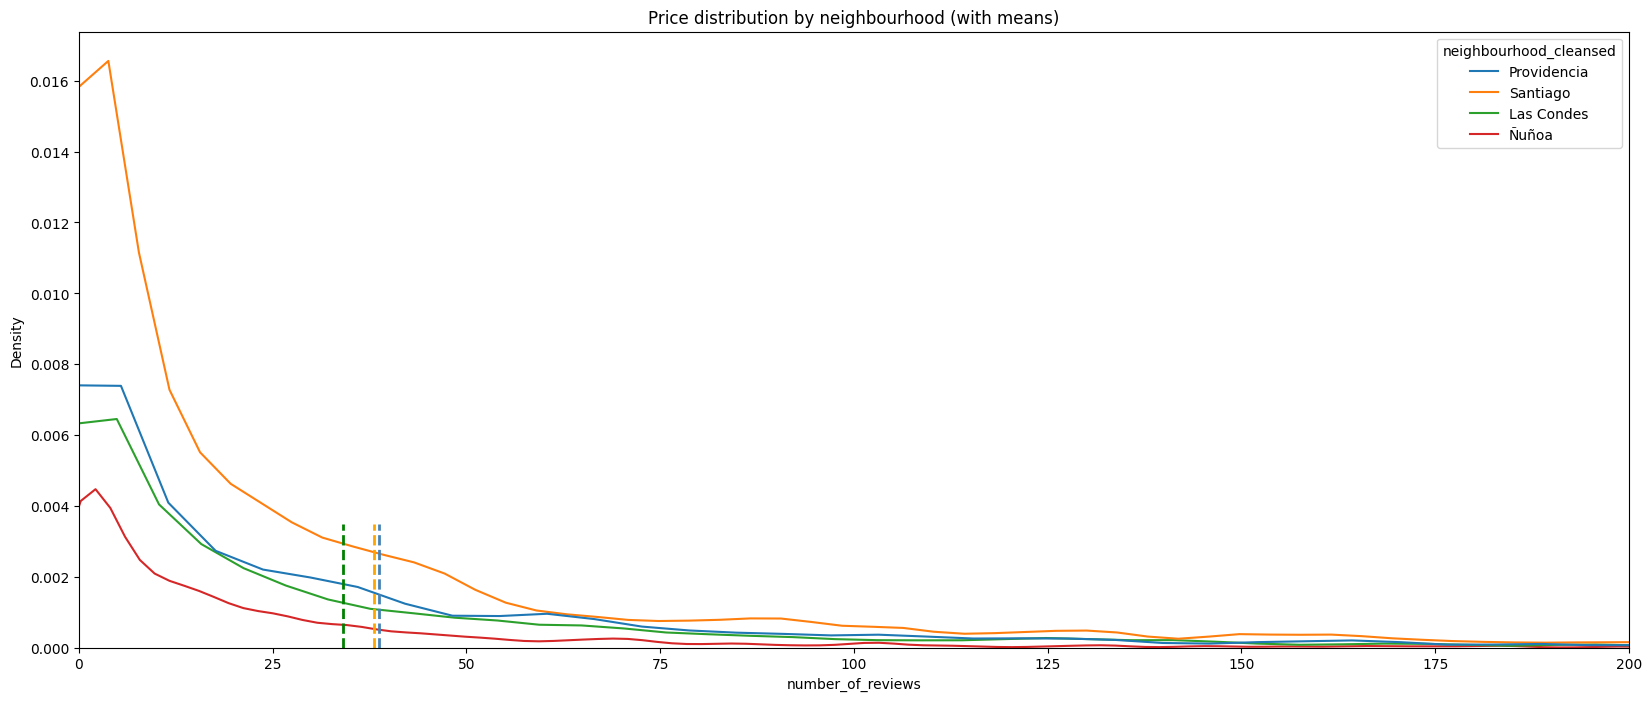

In [113]:
# Plotting number of reviews distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_Santiago_df.loc[listings_Santiago_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_Santiago_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="number_of_reviews",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_Santiago_df.loc[listings_Santiago_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_Santiago_df["neighbourhood_cleansed"] == neighbourhood, "number_of_reviews"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Price distribution by neighbourhood (with means)")
plt.xlim([0, 200])
plt.show()

Price - Property Type

<Figure size 1400x700 with 0 Axes>

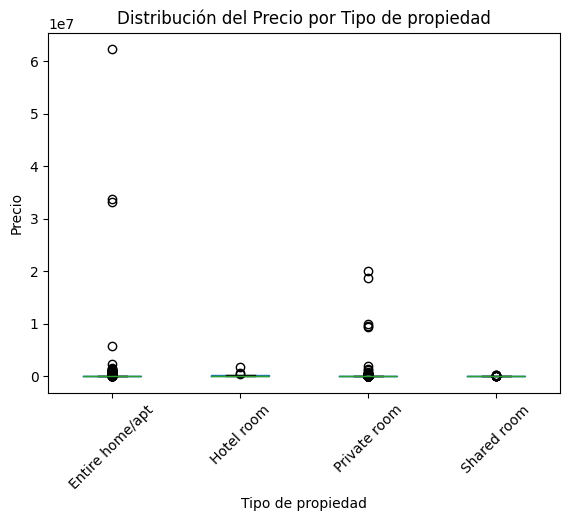

In [114]:
plt.figure(figsize=(14, 7))
listings_Santiago_df.boxplot(column='price_float', by='room_type', grid=False)
plt.title('Distribución del Precio por Tipo de propiedad')
plt.suptitle('')  # Para eliminar el título automático que genera pandas
plt.xlabel('Tipo de propiedad')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#plt.figure(figsize=(10, 8))
#sns.heatmap(listings_Santiago_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
#plt.title('Mapa de Calor de Correlaciones')
#plt.show()

Correlación entre Amenities y Tipo de propiedad con gráfico de barras apilado

Modelos predictivos para las reseñas basados en precio, room_type y vecindario

Análisis de correlación canónica entre price, review_scores_rating y amenities

Regresión Lineal Múltiple: Modelar price como una función de neighbourhood_cleansed, room_type, review_scores_rating, y el número de amenities

PCA: Reducir la dimensionalidad del conjunto de variables amenities para identificar las combinaciones más influyentes y luego analizar cómo se relacionan estas componentes principales con price y review_scores_rating.

Árboles de Decisión: Construir un árbol de decisión para predecir price basado en neighbourhood_cleansed, room_type, review_scores_rating, y el conteo de amenities. Los árboles de decisión pueden capturar interacciones complejas entre las variables

MCA: Si las variables categóricas como neighbourhood_cleansed, room_type, y amenities tienen muchas categorías, el análisis de correspondencias múltiples puede reducir la dimensionalidad y ayudar a identificar patrones y relaciones entre las categorías.

Pair Plot

Gráficos de Superficie: Si quieres visualizar la relación entre tres variables (por ejemplo, price, review_scores_rating, y room_type), un gráfico de superficie puede mostrar cómo cambia price en función de las otras dos variables.

Redes de Correlación: Construir una red donde los nodos representen las variables y las aristas representen las correlaciones entre ellas, ayudando a visualizar las relaciones complejas entre price, neighbourhood_cleansed, room_type, review_scores_rating, y amenities.